In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
Romanos_1 = "Paul, a servant of Jesus Christ, called to be an apostle, separated to the gospel of God,(Which he had promised before by his prophets in the holy scriptures,)Concerning his Son Jesus Christ our Lord, which was made of the seed of David according to the flesh;And declared to be the Son of God with power, according to the spirit of holiness, by the resurrection from the dead:By whom we have received grace and apostleship, for obedience to the faith among all nations, for his name:Among whom are you also the called of Jesus Christ:To all that be in Rome, beloved of God, called to be saints: Grace to you and peace from God our Father, and the Lord Jesus Christ.First, I thank my God through Jesus Christ for you all, that your faith is spoken of throughout the whole world.For God is my witness, whom I serve with my spirit in the gospel of his Son, that without ceasing I make mention of you always in my prayers;Making request, if by any means now at length I might have a prosperous journey by the will of God to come to you.For I long to see you, that I may impart to you some spiritual gift, to the end you may be established;That is, that I may be comforted together with you by the mutual faith both of you and me.Now I would not have you ignorant, brothers, that oftentimes I purposed to come to you, (but was let till now,) that I might have some fruit among you also, even as among other Gentiles.I am debtor both to the Greeks, and to the Barbarians; both to the wise, and to the unwise.So, as much as in me is, I am ready to preach the gospel to you that are at Rome also.For I am not ashamed of the gospel of Christ: for it is the power of God to salvation to every one that believes; to the Jew first, and also to the Greek.For therein is the righteousness of God revealed from faith to faith: as it is written, The just shall live by faith.For the wrath of God is revealed from heaven against all ungodliness and unrighteousness of men, who hold the truth in unrighteousness;Because that which may be known of God is manifest in them; for God has showed it to them.For the invisible things of him from the creation of the world are clearly seen, being understood by the things that are made, even his eternal power and Godhead; so that they are without excuse:Because that, when they knew God, they glorified him not as God, neither were thankful; but became vain in their imaginations, and their foolish heart was darkened.Professing themselves to be wise, they became fools,And changed the glory of the incorruptible God into an image made like to corruptible man, and to birds, and four footed beasts, and creeping things.Why God also gave them up to uncleanness through the lusts of their own hearts, to dishonor their own bodies between themselves:Who changed the truth of God into a lie, and worshipped and served the creature more than the Creator, who is blessed for ever. Amen.For this cause God gave them up to vile affections: for even their women did change the natural use into that which is against nature:And likewise also the men, leaving the natural use of the woman, burned in their lust one toward another; men with men working that which is unseemly, and receiving in themselves that recompense of their error which was meet.And even as they did not like to retain God in their knowledge, God gave them over to a reprobate mind, to do those things which are not convenient;Being filled with all unrighteousness, fornication, wickedness, covetousness, maliciousness; full of envy, murder, debate, deceit, malignity; whisperers,Backbiters, haters of God, despiteful, proud, boasters, inventors of evil things, disobedient to parents,Without understanding, covenant breakers, without natural affection, implacable, unmerciful:Who knowing the judgment of God, that they which commit such things are worthy of death, not only do the same, but have pleasure in them that do them.".lower()

In [6]:
Romanos_2 = "Therefore you are inexcusable, O man, whoever you are that judge: for wherein you judge another, you condemn yourself; for you that judge do the same things.But we are sure that the judgment of God is according to truth against them which commit such things.And think you this, O man, that judge them which do such things, and do the same, that you shall escape the judgment of God?Or despise you the riches of his goodness and forbearance and long-suffering; not knowing that the goodness of God leads you to repentance?But after your hardness and impenitent heart treasure up to yourself wrath against the day of wrath and revelation of the righteous judgment of God;Who will render to every man according to his deeds:To them who by patient continuance in well doing seek for glory and honor and immortality, eternal life:But to them that are contentious, and do not obey the truth, but obey unrighteousness, indignation and wrath,Tribulation and anguish, on every soul of man that does evil, of the Jew first, and also of the Gentile;But glory, honor, and peace, to every man that works good, to the Jew first, and also to the Gentile:For there is no respect of persons with God.For as many as have sinned without law shall also perish without law: and as many as have sinned in the law shall be judged by the law;(For not the hearers of the law are just before God, but the doers of the law shall be justified.For when the Gentiles, which have not the law, do by nature the things contained in the law, these, having not the law, are a law to themselves:Which show the work of the law written in their hearts, their conscience also bearing witness, and their thoughts the mean while accusing or else excusing one another;)In the day when God shall judge the secrets of men by Jesus Christ according to my gospel.Behold, you are called a Jew, and rest in the law, and make your boast of God,And know his will, and approve the things that are more excellent, being instructed out of the law;And are confident that you yourself are a guide of the blind, a light of them which are in darkness,An instructor of the foolish, a teacher of babes, which have the form of knowledge and of the truth in the law.You therefore which teach another, teach you not yourself? you that preach a man should not steal, do you steal?You that say a man should not commit adultery, do you commit adultery? you that abhor idols, do you commit sacrilege?You that make your boast of the law, through breaking the law dishonor you God?For the name of God is blasphemed among the Gentiles through you, as it is written.For circumcision truly profits, if you keep the law: but if you be a breaker of the law, your circumcision is made uncircumcision.Therefore if the uncircumcision keep the righteousness of the law, shall not his uncircumcision be counted for circumcision?And shall not uncircumcision which is by nature, if it fulfill the law, judge you, who by the letter and circumcision do transgress the law?For he is not a Jew, which is one outwardly; neither is that circumcision, which is outward in the flesh:But he is a Jew, which is one inwardly; and circumcision is that of the heart, in the spirit, and not in the letter; whose praise is not of men, but of God.".lower()

In [7]:
Romanos_3 = "What advantage then has the Jew? or what profit is there of circumcision?Much every way: chiefly, because that to them were committed the oracles of God.For what if some did not believe? shall their unbelief make the faith of God without effect?God forbid: yes, let God be true, but every man a liar; as it is written, That you might be justified in your sayings, and might overcome when you are judged.But if our unrighteousness commend the righteousness of God, what shall we say? Is God unrighteous who takes vengeance? (I speak as a man)God forbid: for then how shall God judge the world?For if the truth of God has more abounded through my lie to his glory; why yet am I also judged as a sinner?And not rather, (as we be slanderously reported, and as some affirm that we say,) Let us do evil, that good may come? whose damnation is just.What then? are we better than they? No, in no wise: for we have before proved both Jews and Gentiles, that they are all under sin;As it is written, There is none righteous, no, not one:There is none that understands, there is none that seeks after God.They are all gone out of the way, they are together become unprofitable; there is none that does good, no, not one.Their throat is an open sepulcher; with their tongues they have used deceit; the poison of asps is under their lips:Whose mouth is full of cursing and bitterness:Their feet are swift to shed blood:Destruction and misery are in their ways:And the way of peace have they not known:There is no fear of God before their eyes.Now we know that what things soever the law said, it said to them who are under the law: that every mouth may be stopped, and all the world may become guilty before God.Therefore by the deeds of the law there shall no flesh be justified in his sight: for by the law is the knowledge of sin.But now the righteousness of God without the law is manifested, being witnessed by the law and the prophets;Even the righteousness of God which is by faith of Jesus Christ to all and on all them that believe: for there is no difference:For all have sinned, and come short of the glory of God;Being justified freely by his grace through the redemption that is in Christ Jesus:Whom God has set forth to be a propitiation through faith in his blood, to declare his righteousness for the remission of sins that are past, through the forbearance of God;To declare, I say, at this time his righteousness: that he might be just, and the justifier of him which believes in Jesus.Where is boasting then? It is excluded. By what law? of works? No: but by the law of faith.Therefore we conclude that a man is justified by faith without the deeds of the law.Is he the God of the Jews only? is he not also of the Gentiles? Yes, of the Gentiles also:Seeing it is one God, which shall justify the circumcision by faith, and uncircumcision through faith.Do we then make void the law through faith? God forbid: yes, we establish the law.".lower()

In [8]:
Romanos_4 = "What shall we say then that Abraham our father, as pertaining to the flesh, has found?For if Abraham were justified by works, he has whereof to glory; but not before God.For what said the scripture? Abraham believed God, and it was counted to him for righteousness.Now to him that works is the reward not reckoned of grace, but of debt.But to him that works not, but believes on him that justifies the ungodly, his faith is counted for righteousness.Even as David also describes the blessedness of the man, to whom God imputes righteousness without works,Saying, Blessed are they whose iniquities are forgiven, and whose sins are covered.Blessed is the man to whom the Lord will not impute sin.Comes this blessedness then on the circumcision only, or on the uncircumcision also? for we say that faith was reckoned to Abraham for righteousness.How was it then reckoned? when he was in circumcision, or in uncircumcision? Not in circumcision, but in uncircumcision.And he received the sign of circumcision, a seal of the righteousness of the faith which he had yet being uncircumcised: that he might be the father of all them that believe, though they be not circumcised; that righteousness might be imputed to them also:And the father of circumcision to them who are not of the circumcision only, but who also walk in the steps of that faith of our father Abraham, which he had being yet uncircumcised.For the promise, that he should be the heir of the world, was not to Abraham, or to his seed, through the law, but through the righteousness of faith.For if they which are of the law be heirs, faith is made void, and the promise made of none effect:Because the law works wrath: for where no law is, there is no transgression.Therefore it is of faith, that it might be by grace; to the end the promise might be sure to all the seed; not to that only which is of the law, but to that also which is of the faith of Abraham; who is the father of us all,(As it is written, I have made you a father of many nations,) before him whom he believed, even God, who vivifies the dead, and calls those things which be not as though they were.Who against hope believed in hope, that he might become the father of many nations, according to that which was spoken, So shall your seed be.And being not weak in faith, he considered not his own body now dead, when he was about an hundred years old, neither yet the deadness of Sarah' womb:He staggered not at the promise of God through unbelief; but was strong in faith, giving glory to God;And being fully persuaded that, what he had promised, he was able also to perform.And therefore it was imputed to him for righteousness.Now it was not written for his sake alone, that it was imputed to him;But for us also, to whom it shall be imputed, if we believe on him that raised up Jesus our Lord from the dead;Who was delivered for our offenses, and was raised again for our justification.".lower()

In [9]:
Romanos_5 = "Therefore being justified by faith, we have peace with God through our Lord Jesus Christ:By whom also we have access by faith into this grace wherein we stand, and rejoice in hope of the glory of God.And not only so, but we glory in tribulations also: knowing that tribulation works patience;And patience, experience; and experience, hope:And hope makes not ashamed; because the love of God is shed abroad in our hearts by the Holy Ghost which is given to us.For when we were yet without strength, in due time Christ died for the ungodly.For scarcely for a righteous man will one die: yet peradventure for a good man some would even dare to die.But God commends his love toward us, in that, while we were yet sinners, Christ died for us.Much more then, being now justified by his blood, we shall be saved from wrath through him.For if, when we were enemies, we were reconciled to God by the death of his Son, much more, being reconciled, we shall be saved by his life.And not only so, but we also joy in God through our Lord Jesus Christ, by whom we have now received the atonement.Why, as by one man sin entered into the world, and death by sin; and so death passed on all men, for that all have sinned:(For until the law sin was in the world: but sin is not imputed when there is no law.Nevertheless death reigned from Adam to Moses, even over them that had not sinned after the similitude of Adam' transgression, who is the figure of him that was to come.But not as the offense, so also is the free gift. For if through the offense of one many be dead, much more the grace of God, and the gift by grace, which is by one man, Jesus Christ, has abounded to many.And not as it was by one that sinned, so is the gift: for the judgment was by one to condemnation, but the free gift is of many offenses to justification.For if by one man' offense death reigned by one; much more they which receive abundance of grace and of the gift of righteousness shall reign in life by one, Jesus Christ.)Therefore as by the offense of one judgment came on all men to condemnation; even so by the righteousness of one the free gift came on all men to justification of life.For as by one man' disobedience many were made sinners, so by the obedience of one shall many be made righteous.Moreover the law entered, that the offense might abound. But where sin abounded, grace did much more abound:That as sin has reigned to death, even so might grace reign through righteousness to eternal life by Jesus Christ our Lord.".lower()

In [10]:
Romanos_6 = "What shall we say then? Shall we continue in sin, that grace may abound?God forbid. How shall we, that are dead to sin, live any longer therein?Know you not, that so many of us as were baptized into Jesus Christ were baptized into his death?Therefore we are buried with him by baptism into death: that like as Christ was raised up from the dead by the glory of the Father, even so we also should walk in newness of life.For if we have been planted together in the likeness of his death, we shall be also in the likeness of his resurrection:Knowing this, that our old man is crucified with him, that the body of sin might be destroyed, that from now on we should not serve sin.For he that is dead is freed from sin.Now if we be dead with Christ, we believe that we shall also live with him:Knowing that Christ being raised from the dead dies no more; death has no more dominion over him.For in that he died, he died to sin once: but in that he lives, he lives to God.Likewise reckon you also yourselves to be dead indeed to sin, but alive to God through Jesus Christ our Lord.Let not sin therefore reign in your mortal body, that you should obey it in the lusts thereof.Neither yield you your members as instruments of unrighteousness to sin: but yield yourselves to God, as those that are alive from the dead, and your members as instruments of righteousness to God.For sin shall not have dominion over you: for you are not under the law, but under grace.What then? shall we sin, because we are not under the law, but under grace? God forbid.Know you not, that to whom you yield yourselves servants to obey, his servants you are to whom you obey; whether of sin to death, or of obedience to righteousness?But God be thanked, that you were the servants of sin, but you have obeyed from the heart that form of doctrine which was delivered you.Being then made free from sin, you became the servants of righteousness.I speak after the manner of men because of the infirmity of your flesh: for as you have yielded your members servants to uncleanness and to iniquity to iniquity; even so now yield your members servants to righteousness to holiness.For when you were the servants of sin, you were free from righteousness.What fruit had you then in those things whereof you are now ashamed? for the end of those things is death.But now being made free from sin, and become servants to God, you have your fruit to holiness, and the end everlasting life.For the wages of sin is death; but the gift of God is eternal life through Jesus Christ our Lord.".lower()

In [11]:
Romanos_7 = "Know you not, brothers, (for I speak to them that know the law,) how that the law has dominion over a man as long as he lives?For the woman which has an husband is bound by the law to her husband so long as he lives; but if the husband be dead, she is loosed from the law of her husband.So then if, while her husband lives, she be married to another man, she shall be called an adulteress: but if her husband be dead, she is free from that law; so that she is no adulteress, though she be married to another man.Why, my brothers, you also are become dead to the law by the body of Christ; that you should be married to another, even to him who is raised from the dead, that we should bring forth fruit to God.For when we were in the flesh, the motions of sins, which were by the law, did work in our members to bring forth fruit to death.But now we are delivered from the law, that being dead wherein we were held; that we should serve in newness of spirit, and not in the oldness of the letter.What shall we say then? Is the law sin? God forbid. No, I had not known sin, but by the law: for I had not known lust, except the law had said, You shall not covet.But sin, taking occasion by the commandment, worked in me all manner of concupiscence. For without the law sin was dead.For I was alive without the law once: but when the commandment came, sin revived, and I died.And the commandment, which was ordained to life, I found to be to death.For sin, taking occasion by the commandment, deceived me, and by it slew me.Why the law is holy, and the commandment holy, and just, and good.Was then that which is good made death to me? God forbid. But sin, that it might appear sin, working death in me by that which is good; that sin by the commandment might become exceeding sinful.For we know that the law is spiritual: but I am carnal, sold under sin.For that which I do I allow not: for what I would, that do I not; but what I hate, that do I.If then I do that which I would not, I consent to the law that it is good.Now then it is no more I that do it, but sin that dwells in me.For I know that in me (that is, in my flesh,) dwells no good thing: for to will is present with me; but how to perform that which is good I find not.For the good that I would I do not: but the evil which I would not, that I do.Now if I do that I would not, it is no more I that do it, but sin that dwells in me.I find then a law, that, when I would do good, evil is present with me.For I delight in the law of God after the inward man:But I see another law in my members, warring against the law of my mind, and bringing me into captivity to the law of sin which is in my members.O wretched man that I am! who shall deliver me from the body of this death?I thank God through Jesus Christ our Lord. So then with the mind I myself serve the law of God; but with the flesh the law of sin.".lower()

In [12]:
Romanos_8 = "There is therefore now no condemnation to them which are in Christ Jesus, who walk not after the flesh, but after the Spirit.For the law of the Spirit of life in Christ Jesus has made me free from the law of sin and death.For what the law could not do, in that it was weak through the flesh, God sending his own Son in the likeness of sinful flesh, and for sin, condemned sin in the flesh:That the righteousness of the law might be fulfilled in us, who walk not after the flesh, but after the Spirit.For they that are after the flesh do mind the things of the flesh; but they that are after the Spirit the things of the Spirit.For to be carnally minded is death; but to be spiritually minded is life and peace.Because the carnal mind is enmity against God: for it is not subject to the law of God, neither indeed can be.So then they that are in the flesh cannot please God.But you are not in the flesh, but in the Spirit, if so be that the Spirit of God dwell in you. Now if any man have not the Spirit of Christ, he is none of his.And if Christ be in you, the body is dead because of sin; but the Spirit is life because of righteousness.But if the Spirit of him that raised up Jesus from the dead dwell in you, he that raised up Christ from the dead shall also quicken your mortal bodies by his Spirit that dwells in you.Therefore, brothers, we are debtors, not to the flesh, to live after the flesh.For if you live after the flesh, you shall die: but if you through the Spirit do mortify the deeds of the body, you shall live.For as many as are led by the Spirit of God, they are the sons of God.For you have not received the spirit of bondage again to fear; but you have received the Spirit of adoption, whereby we cry, Abba, Father.The Spirit itself bears witness with our spirit, that we are the children of God:And if children, then heirs; heirs of God, and joint-heirs with Christ; if so be that we suffer with him, that we may be also glorified together.For I reckon that the sufferings of this present time are not worthy to be compared with the glory which shall be revealed in us.For the earnest expectation of the creature waits for the manifestation of the sons of God.For the creature was made subject to vanity, not willingly, but by reason of him who has subjected the same in hope,Because the creature itself also shall be delivered from the bondage of corruption into the glorious liberty of the children of God.For we know that the whole creation groans and travails in pain together until now.And not only they, but ourselves also, which have the first fruits of the Spirit, even we ourselves groan within ourselves, waiting for the adoption, to wit, the redemption of our body.For we are saved by hope: but hope that is seen is not hope: for what a man sees, why does he yet hope for?But if we hope for that we see not, then do we with patience wait for it.Likewise the Spirit also helps our infirmities: for we know not what we should pray for as we ought: but the Spirit itself makes intercession for us with groanings which cannot be uttered.And he that searches the hearts knows what is the mind of the Spirit, because he makes intercession for the saints according to the will of God.And we know that all things work together for good to them that love God, to them who are the called according to his purpose.For whom he did foreknow, he also did predestinate to be conformed to the image of his Son, that he might be the firstborn among many brothers.Moreover whom he did predestinate, them he also called: and whom he called, them he also justified: and whom he justified, them he also glorified.What shall we then say to these things? If God be for us, who can be against us?He that spared not his own Son, but delivered him up for us all, how shall he not with him also freely give us all things?Who shall lay any thing to the charge of God' elect? It is God that justifies.Who is he that comdemns? It is Christ that died, yes rather, that is risen again, who is even at the right hand of God, who also makes intercession for us.Who shall separate us from the love of Christ? shall tribulation, or distress, or persecution, or famine, or nakedness, or peril, or sword?As it is written, For your sake we are killed all the day long; we are accounted as sheep for the slaughter.No, in all these things we are more than conquerors through him that loved us.For I am persuaded, that neither death, nor life, nor angels, nor principalities, nor powers, nor things present, nor things to come,Nor height, nor depth, nor any other creature, shall be able to separate us from the love of God, which is in Christ Jesus our Lord.".lower()

In [13]:
Romanos_9 = "I say the truth in Christ, I lie not, my conscience also bearing me witness in the Holy Ghost,That I have great heaviness and continual sorrow in my heart.For I could wish that myself were accursed from Christ for my brothers, my kinsmen according to the flesh:Who are Israelites; to whom pertains the adoption, and the glory, and the covenants, and the giving of the law, and the service of God, and the promises;Whose are the fathers, and of whom as concerning the flesh Christ came, who is over all, God blessed for ever. Amen.Not as though the word of God has taken none effect. For they are not all Israel, which are of Israel:Neither, because they are the seed of Abraham, are they all children: but, In Isaac shall your seed be called.That is, They which are the children of the flesh, these are not the children of God: but the children of the promise are counted for the seed.For this is the word of promise, At this time will I come, and Sarah shall have a son.And not only this; but when Rebecca also had conceived by one, even by our father Isaac;(For the children being not yet born, neither having done any good or evil, that the purpose of God according to election might stand, not of works, but of him that calls;)It was said to her, The elder shall serve the younger.As it is written, Jacob have I loved, but Esau have I hated.What shall we say then? Is there unrighteousness with God? God forbid.For he said to Moses, I will have mercy on whom I will have mercy, and I will have compassion on whom I will have compassion.So then it is not of him that wills, nor of him that runs, but of God that shows mercy.For the scripture said to Pharaoh, Even for this same purpose have I raised you up, that I might show my power in you, and that my name might be declared throughout all the earth.Therefore has he mercy on whom he will have mercy, and whom he will he hardens.You will say then to me, Why does he yet find fault? For who has resisted his will?No but, O man, who are you that reply against God? Shall the thing formed say to him that formed it, Why have you made me thus?Has not the potter power over the clay, of the same lump to make one vessel to honor, and another to dishonor?What if God, willing to show his wrath, and to make his power known, endured with much long-suffering the vessels of wrath fitted to destruction:And that he might make known the riches of his glory on the vessels of mercy, which he had before prepared to glory,Even us, whom he has called, not of the Jews only, but also of the Gentiles?As he said also in Osee, I will call them my people, which were not my people; and her beloved, which was not beloved.And it shall come to pass, that in the place where it was said to them, You are not my people; there shall they be called the children of the living God.Esaias also cries concerning Israel, Though the number of the children of Israel be as the sand of the sea, a remnant shall be saved:For he will finish the work, and cut it short in righteousness: because a short work will the Lord make on the earth.And as Esaias said before, Except the Lord of Sabaoth had left us a seed, we had been as Sodoma, and been made like to Gomorrha.What shall we say then? That the Gentiles, which followed not after righteousness, have attained to righteousness, even the righteousness which is of faith.But Israel, which followed after the law of righteousness, has not attained to the law of righteousness.Why? Because they sought it not by faith, but as it were by the works of the law. For they stumbled at that stumbling stone;As it is written, Behold, I lay in Sion a stumbling stone and rock of offense: and whoever believes on him shall not be ashamed.".lower()

In [14]:
Romanos_10 = "Brothers, my heart' desire and prayer to God for Israel is, that they might be saved.For I bear them record that they have a zeal of God, but not according to knowledge.For they being ignorant of God' righteousness, and going about to establish their own righteousness, have not submitted themselves to the righteousness of God.For Christ is the end of the law for righteousness to every one that believes.For Moses describes the righteousness which is of the law, That the man which does those things shall live by them.But the righteousness which is of faith speaks on this wise, Say not in your heart, Who shall ascend into heaven? (that is, to bring Christ down from above:)Or, Who shall descend into the deep? (that is, to bring up Christ again from the dead.)But what said it? The word is near you, even in your mouth, and in your heart: that is, the word of faith, which we preach;That if you shall confess with your mouth the Lord Jesus, and shall believe in your heart that God has raised him from the dead, you shall be saved.For with the heart man believes to righteousness; and with the mouth confession is made to salvation.For the scripture said, Whoever believes on him shall not be ashamed.For there is no difference between the Jew and the Greek: for the same Lord over all is rich to all that call on him.For whoever shall call on the name of the Lord shall be saved.How then shall they call on him in whom they have not believed? and how shall they believe in him of whom they have not heard? and how shall they hear without a preacher?And how shall they preach, except they be sent? as it is written, How beautiful are the feet of them that preach the gospel of peace, and bring glad tidings of good things!But they have not all obeyed the gospel. For Esaias said, Lord, who has believed our report?So then faith comes by hearing, and hearing by the word of God.But I say, Have they not heard? Yes truly, their sound went into all the earth, and their words to the ends of the world.But I say, Did not Israel know? First Moses said, I will provoke you to jealousy by them that are no people, and by a foolish nation I will anger you.But Esaias is very bold, and said, I was found of them that sought me not; I was made manifest to them that asked not after me.But to Israel he said, All day long I have stretched forth my hands to a disobedient and gainsaying people.".lower()

In [15]:
Romanos_11 = "I say then, Has God cast away his people? God forbid. For I also am an Israelite, of the seed of Abraham, of the tribe of Benjamin.God has not cast away his people which he foreknew. Know you not what the scripture said of Elias? how he makes intercession to God against Israel saying,Lord, they have killed your prophets, and dig down your altars; and I am left alone, and they seek my life.But what said the answer of God to him? I have reserved to myself seven thousand men, who have not bowed the knee to the image of Baal.Even so then at this present time also there is a remnant according to the election of grace.And if by grace, then is it no more of works: otherwise grace is no more grace. But if it be of works, then it is no more grace: otherwise work is no more work.What then? Israel has not obtained that which he seeks for; but the election has obtained it, and the rest were blinded.(According as it is written, God has given them the spirit of slumber, eyes that they should not see, and ears that they should not hear;) to this day.And David said, Let their table be made a snare, and a trap, and a stumbling block, and a recompense to them:Let their eyes be darkened, that they may not see, and bow down their back always.I say then, Have they stumbled that they should fall? God forbid: but rather through their fall salvation is come to the Gentiles, for to provoke them to jealousy.Now if the fall of them be the riches of the world, and the diminishing of them the riches of the Gentiles; how much more their fullness?For I speak to you Gentiles, inasmuch as I am the apostle of the Gentiles, I magnify my office:If by any means I may provoke to emulation them which are my flesh, and might save some of them.For if the casting away of them be the reconciling of the world, what shall the receiving of them be, but life from the dead?For if the first fruit be holy, the lump is also holy: and if the root be holy, so are the branches.And if some of the branches be broken off, and you, being a wild olive tree, were grafted in among them, and with them partake of the root and fatness of the olive tree;Boast not against the branches. But if you boast, you bore not the root, but the root you.You will say then, The branches were broken off, that I might be grafted in.Well; because of unbelief they were broken off, and you stand by faith. Be not high minded, but fear:For if God spared not the natural branches, take heed lest he also spare not you.Behold therefore the goodness and severity of God: on them which fell, severity; but toward you, goodness, if you continue in his goodness: otherwise you also shall be cut off.And they also, if they abide not still in unbelief, shall be grafted in: for God is able to graft them in again.For if you were cut out of the olive tree which is wild by nature, and were grafted contrary to nature into a good olive tree: how much more shall these, which be the natural branches, be grafted into their own olive tree?For I would not, brothers, that you should be ignorant of this mystery, lest you should be wise in your own conceits; that blindness in part is happened to Israel, until the fullness of the Gentiles be come in.And so all Israel shall be saved: as it is written, There shall come out of Sion the Deliverer, and shall turn away ungodliness from Jacob:For this is my covenant to them, when I shall take away their sins.As concerning the gospel, they are enemies for your sakes: but as touching the election, they are beloved for the father' sakes.For the gifts and calling of God are without repentance.For as you in times past have not believed God, yet have now obtained mercy through their unbelief:Even so have these also now not believed, that through your mercy they also may obtain mercy.For God has concluded them all in unbelief, that he might have mercy on all.O the depth of the riches both of the wisdom and knowledge of God! how unsearchable are his judgments, and his ways past finding out!For who has known the mind of the Lord? or who has been his counselor?Or who has first given to him, and it shall be recompensed to him again?For of him, and through him, and to him, are all things: to whom be glory for ever. Amen.".lower()

In [16]:
Romanos_12 = "I beseech you therefore, brothers, by the mercies of God, that you present your bodies a living sacrifice, holy, acceptable to God, which is your reasonable service.And be not conformed to this world: but be you transformed by the renewing of your mind, that you may prove what is that good, and acceptable, and perfect, will of God.For I say, through the grace given to me, to every man that is among you, not to think of himself more highly than he ought to think; but to think soberly, according as God has dealt to every man the measure of faith.For as we have many members in one body, and all members have not the same office:So we, being many, are one body in Christ, and every one members one of another.Having then gifts differing according to the grace that is given to us, whether prophecy, let us prophesy according to the proportion of faith;Or ministry, let us wait on our ministering: or he that teaches, on teaching;Or he that exhorts, on exhortation: he that gives, let him do it with simplicity; he that rules, with diligence; he that shows mercy, with cheerfulness.Let love be without dissimulation. Abhor that which is evil; hold to that which is good.Be kindly affectionate one to another with brotherly love; in honor preferring one another;Not slothful in business; fervent in spirit; serving the Lord;Rejoicing in hope; patient in tribulation; continuing instant in prayer;Distributing to the necessity of saints; given to hospitality.Bless them which persecute you: bless, and curse not.Rejoice with them that do rejoice, and weep with them that weep.Be of the same mind one toward another. Mind not high things, but condescend to men of low estate. Be not wise in your own conceits.Recompense to no man evil for evil. Provide things honest in the sight of all men.If it be possible, as much as lies in you, live peaceably with all men.Dearly beloved, avenge not yourselves, but rather give place to wrath: for it is written, Vengeance is mine; I will repay, said the Lord.Therefore if your enemy hunger, feed him; if he thirst, give him drink: for in so doing you shall heap coals of fire on his head.Be not overcome of evil, but overcome evil with good.".lower()

In [17]:
Romanos_13 = "Let every soul be subject to the higher powers. For there is no power but of God: the powers that be are ordained of God.Whoever therefore resists the power, resists the ordinance of God: and they that resist shall receive to themselves damnation.For rulers are not a terror to good works, but to the evil. Will you then not be afraid of the power? do that which is good, and you shall have praise of the same:For he is the minister of God to you for good. But if you do that which is evil, be afraid; for he bears not the sword in vain: for he is the minister of God, a revenger to execute wrath on him that does evil.Why you must needs be subject, not only for wrath, but also for conscience sake.For for this cause pay you tribute also: for they are God' ministers, attending continually on this very thing.Render therefore to all their dues: tribute to whom tribute is due; custom to whom custom; fear to whom fear; honor to whom honor.Owe no man any thing, but to love one another: for he that loves another has fulfilled the law.For this, You shall not commit adultery, You shall not kill, You shall not steal, You shall not bear false witness, You shall not covet; and if there be any other commandment, it is briefly comprehended in this saying, namely, You shall love your neighbor as yourself.Love works no ill to his neighbor: therefore love is the fulfilling of the law.And that, knowing the time, that now it is high time to awake out of sleep: for now is our salvation nearer than when we believed.The night is far spent, the day is at hand: let us therefore cast off the works of darkness, and let us put on the armor of light.Let us walk honestly, as in the day; not in rioting and drunkenness, not in chambering and wantonness, not in strife and envying.But put you on the Lord Jesus Christ, and make not provision for the flesh, to fulfill the lusts thereof.".lower()

In [18]:
Romanos_14 = "Him that is weak in the faith receive you, but not to doubtful disputations.For one believes that he may eat all things: another, who is weak, eats herbs.Let not him that eats despise him that eats not; and let not him which eats not judge him that eats: for God has received him.Who are you that judge another man' servant? to his own master he stands or falls. Yes, he shall be held up: for God is able to make him stand.One man esteems one day above another: another esteems every day alike. Let every man be fully persuaded in his own mind.He that regards the day, regards it to the Lord; and he that regards not the day, to the Lord he does not regard it. He that eats, eats to the Lord, for he gives God thanks; and he that eats not, to the Lord he eats not, and gives God thanks.For none of us lives to himself, and no man dies to himself.For whether we live, we live to the Lord; and whether we die, we die to the Lord: whether we live therefore, or die, we are the Lord'.For to this end Christ both died, and rose, and revived, that he might be Lord both of the dead and living.But why do you judge your brother? or why do you set at nothing your brother? for we shall all stand before the judgment seat of Christ.For it is written, As I live, said the Lord, every knee shall bow to me, and every tongue shall confess to God.So then every one of us shall give account of himself to God.Let us not therefore judge one another any more: but judge this rather, that no man put a stumbling block or an occasion to fall in his brother' way.I know, and am persuaded by the Lord Jesus, that there is nothing unclean of itself: but to him that esteems any thing to be unclean, to him it is unclean.But if your brother be grieved with your meat, now walk you not charitably. Destroy not him with your meat, for whom Christ died.Let not then your good be evil spoken of:For the kingdom of God is not meat and drink; but righteousness, and peace, and joy in the Holy Ghost.For he that in these things serves Christ is acceptable to God, and approved of men.Let us therefore follow after the things which make for peace, and things with which one may edify another.For meat destroy not the work of God. All things indeed are pure; but it is evil for that man who eats with offense.It is good neither to eat flesh, nor to drink wine, nor any thing whereby your brother stumbles, or is offended, or is made weak.Have you faith? have it to yourself before God. Happy is he that comdemns not himself in that thing which he allows.And he that doubts is damned if he eat, because he eats not of faith: for whatever is not of faith is sin.".lower()

In [19]:
Romanos_15 = "We then that are strong ought to bear the infirmities of the weak, and not to please ourselves.Let every one of us please his neighbor for his good to edification.For even Christ pleased not himself; but, as it is written, The reproaches of them that reproached you fell on me.For whatever things were written aforetime were written for our learning, that we through patience and comfort of the scriptures might have hope.Now the God of patience and consolation grant you to be like minded one toward another according to Christ Jesus:That you may with one mind and one mouth glorify God, even the Father of our Lord Jesus Christ.Why receive you one another, as Christ also received us to the glory of God.Now I say that Jesus Christ was a minister of the circumcision for the truth of God, to confirm the promises made to the fathers:And that the Gentiles might glorify God for his mercy; as it is written, For this cause I will confess to you among the Gentiles, and sing to your name.And again he said, Rejoice, you Gentiles, with his people.And again, Praise the Lord, all you Gentiles; and laud him, all you people.And again, Esaias said, There shall be a root of Jesse, and he that shall rise to reign over the Gentiles; in him shall the Gentiles trust.Now the God of hope fill you with all joy and peace in believing, that you may abound in hope, through the power of the Holy Ghost.And I myself also am persuaded of you, my brothers, that you also are full of goodness, filled with all knowledge, able also to admonish one another.Nevertheless, brothers, I have written the more boldly to you in some sort, as putting you in mind, because of the grace that is given to me of God,That I should be the minister of Jesus Christ to the Gentiles, ministering the gospel of God, that the offering up of the Gentiles might be acceptable, being sanctified by the Holy Ghost.I have therefore whereof I may glory through Jesus Christ in those things which pertain to God.For I will not dare to speak of any of those things which Christ has not worked by me, to make the Gentiles obedient, by word and deed,Through mighty signs and wonders, by the power of the Spirit of God; so that from Jerusalem, and round about to Illyricum, I have fully preached the gospel of Christ.Yes, so have I strived to preach the gospel, not where Christ was named, lest I should build on another man' foundation:But as it is written, To whom he was not spoken of, they shall see: and they that have not heard shall understand.For which cause also I have been much hindered from coming to you.But now having no more place in these parts, and having a great desire these many years to come to you;Whenever I take my journey into Spain, I will come to you: for I trust to see you in my journey, and to be brought on my way thitherward by you, if first I be somewhat filled with your company.But now I go to Jerusalem to minister to the saints.For it has pleased them of Macedonia and Achaia to make a certain contribution for the poor saints which are at Jerusalem.It has pleased them truly; and their debtors they are. For if the Gentiles have been made partakers of their spiritual things, their duty is also to minister to them in carnal things.When therefore I have performed this, and have sealed to them this fruit, I will come by you into Spain.And I am sure that, when I come to you, I shall come in the fullness of the blessing of the gospel of Christ.Now I beseech you, brothers, for the Lord Jesus Christ' sake, and for the love of the Spirit, that you strive together with me in your prayers to God for me;That I may be delivered from them that do not believe in Judaea; and that my service which I have for Jerusalem may be accepted of the saints;That I may come to you with joy by the will of God, and may with you be refreshed.Now the God of peace be with you all. Amen.".lower()

In [20]:
Romanos_16 = "I commend to you Phebe our sister, which is a servant of the church which is at Cenchrea:That you receive her in the Lord, as becomes saints, and that you assist her in whatever business she has need of you: for she has been a succorer of many, and of myself also.Greet Priscilla and Aquila my helpers in Christ Jesus:Who have for my life laid down their own necks: to whom not only I give thanks, but also all the churches of the Gentiles.Likewise greet the church that is in their house. Salute my well-beloved Epaenetus, who is the first fruits of Achaia to Christ.Greet Mary, who bestowed much labor on us.Salute Andronicus and Junia, my kinsmen, and my fellow-prisoners, who are of note among the apostles, who also were in Christ before me.Greet Amplias my beloved in the Lord.Salute Urbane, our helper in Christ, and Stachys my beloved.Salute Apelles approved in Christ. Salute them which are of Aristobulus'household.Salute Herodion my kinsman. Greet them that be of the household of Narcissus, which are in the Lord.Salute Tryphena and Tryphosa, who labor in the Lord. Salute the beloved Persis, which labored much in the Lord.Salute Rufus chosen in the Lord, and his mother and mine.Salute Asyncritus, Phlegon, Hermas, Patrobas, Hermes, and the brothers which are with them.Salute Philologus, and Julia, Nereus, and his sister, and Olympas, and all the saints which are with them.Salute one another with an holy kiss. The churches of Christ salute you.Now I beseech you, brothers, mark them which cause divisions and offenses contrary to the doctrine which you have learned; and avoid them.For they that are such serve not our Lord Jesus Christ, but their own belly; and by good words and fair speeches deceive the hearts of the simple.For your obedience is come abroad to all men. I am glad therefore on your behalf: but yet I would have you wise to that which is good, and simple concerning evil.And the God of peace shall bruise Satan under your feet shortly. The grace of our Lord Jesus Christ be with you. Amen.Timotheus my workfellow, and Lucius, and Jason, and Sosipater, my kinsmen, salute you.I Tertius, who wrote this letter, salute you in the Lord.Gaius my host, and of the whole church, salutes you. Erastus the chamberlain of the city salutes you, and Quartus a brother.The grace of our Lord Jesus Christ be with you all. Amen.Now to him that is of power to establish you according to my gospel, and the preaching of Jesus Christ, according to the revelation of the mystery, which was kept secret since the world began,But now is made manifest, and by the scriptures of the prophets, according to the commandment of the everlasting God, made known to all nations for the obedience of faith:To God only wise, be glory through Jesus Christ for ever. Amen.".lower()

In [112]:
tokens = nltk.word_tokenize(Romanos_16)

In [113]:
stop_words = set(stopwords.words('english'))

In [114]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [115]:
print(filtered_sentence1)

['commend', 'phebe', 'sister', ',', 'servant', 'church', 'cenchrea', ':', 'receive', 'lord', ',', 'becomes', 'saints', ',', 'assist', 'whatever', 'business', 'need', ':', 'succorer', 'many', ',', 'also.greet', 'priscilla', 'aquila', 'helpers', 'christ', 'jesus', ':', 'life', 'laid', 'necks', ':', 'give', 'thanks', ',', 'also', 'churches', 'gentiles.likewise', 'greet', 'church', 'house', '.', 'salute', 'well-beloved', 'epaenetus', ',', 'first', 'fruits', 'achaia', 'christ.greet', 'mary', ',', 'bestowed', 'much', 'labor', 'us.salute', 'andronicus', 'junia', ',', 'kinsmen', ',', 'fellow-prisoners', ',', 'note', 'among', 'apostles', ',', 'also', 'christ', 'me.greet', 'amplias', 'beloved', 'lord.salute', 'urbane', ',', 'helper', 'christ', ',', 'stachys', 'beloved.salute', 'apelles', 'approved', 'christ', '.', 'salute', "aristobulus'household.salute", 'herodion', 'kinsman', '.', 'greet', 'household', 'narcissus', ',', 'lord.salute', 'tryphena', 'tryphosa', ',', 'labor', 'lord', '.', 'salute'

In [116]:
data =np.array([["Romanos_1", "'paul', ',', 'servant', 'jesus', 'christ', ',', 'called', 'apostle', ',', 'separated', 'gospel', 'god', ',', '(', 'promised', 'prophets', 'holy', 'scriptures', ',', ')', 'concerning', 'son', 'jesus', 'christ', 'lord', ',', 'made', 'seed', 'david', 'according', 'flesh', ';', 'declared', 'son', 'god', 'power', ',', 'according', 'spirit', 'holiness', ',', 'resurrection', 'dead', ':', 'received', 'grace', 'apostleship', ',', 'obedience', 'faith', 'among', 'nations', ',', 'name', ':', 'among', 'also', 'called', 'jesus', 'christ', ':', 'rome', ',', 'beloved', 'god', ',', 'called', 'saints', ':', 'grace', 'peace', 'god', 'father', ',', 'lord', 'jesus', 'christ.first', ',', 'thank', 'god', 'jesus', 'christ', ',', 'faith', 'spoken', 'throughout', 'whole', 'world.for', 'god', 'witness', ',', 'serve', 'spirit', 'gospel', 'son', ',', 'without', 'ceasing', 'make', 'mention', 'always', 'prayers', ';', 'making', 'request', ',', 'means', 'length', 'might', 'prosperous', 'journey', 'god', 'come', 'you.for', 'long', 'see', ',', 'may', 'impart', 'spiritual', 'gift', ',', 'end', 'may', 'established', ';', ',', 'may', 'comforted', 'together', 'mutual', 'faith', 'me.now', 'would', 'ignorant', ',', 'brothers', ',', 'oftentimes', 'purposed', 'come', ',', '(', 'let', 'till', ',', ')', 'might', 'fruit', 'among', 'also', ',', 'even', 'among', 'gentiles.i', 'debtor', 'greeks', ',', 'barbarians', ';', 'wise', ',', 'unwise.so', ',', 'much', ',', 'ready', 'preach', 'gospel', 'rome', 'also.for', 'ashamed', 'gospel', 'christ', ':', 'power', 'god', 'salvation', 'every', 'one', 'believes', ';', 'jew', 'first', ',', 'also', 'greek.for', 'therein', 'righteousness', 'god', 'revealed', 'faith', 'faith', ':', 'written', ',', 'shall', 'live', 'faith.for', 'wrath', 'god', 'revealed', 'heaven', 'ungodliness', 'unrighteousness', 'men', ',', 'hold', 'truth', 'unrighteousness', ';', 'may', 'known', 'god', 'manifest', ';', 'god', 'showed', 'them.for', 'invisible', 'things', 'creation', 'world', 'clearly', 'seen', ',', 'understood', 'things', 'made', ',', 'even', 'eternal', 'power', 'godhead', ';', 'without', 'excuse', ':', ',', 'knew', 'god', ',', 'glorified', 'god', ',', 'neither', 'thankful', ';', 'became', 'vain', 'imaginations', ',', 'foolish', 'heart', 'darkened.professing', 'wise', ',', 'became', 'fools', ',', 'changed', 'glory', 'incorruptible', 'god', 'image', 'made', 'like', 'corruptible', 'man', ',', 'birds', ',', 'four', 'footed', 'beasts', ',', 'creeping', 'things.why', 'god', 'also', 'gave', 'uncleanness', 'lusts', 'hearts', ',', 'dishonor', 'bodies', ':', 'changed', 'truth', 'god', 'lie', ',', 'worshipped', 'served', 'creature', 'creator', ',', 'blessed', 'ever', '.', 'amen.for', 'cause', 'god', 'gave', 'vile', 'affections', ':', 'even', 'women', 'change', 'natural', 'use', 'nature', ':', 'likewise', 'also', 'men', ',', 'leaving', 'natural', 'use', 'woman', ',', 'burned', 'lust', 'one', 'toward', 'another', ';', 'men', 'men', 'working', 'unseemly', ',', 'receiving', 'recompense', 'error', 'meet.and', 'even', 'like', 'retain', 'god', 'knowledge', ',', 'god', 'gave', 'reprobate', 'mind', ',', 'things', 'convenient', ';', 'filled', 'unrighteousness', ',', 'fornication', ',', 'wickedness', ',', 'covetousness', ',', 'maliciousness', ';', 'full', 'envy', ',', 'murder', ',', 'debate', ',', 'deceit', ',', 'malignity', ';', 'whisperers', ',', 'backbiters', ',', 'haters', 'god', ',', 'despiteful', ',', 'proud', ',', 'boasters', ',', 'inventors', 'evil', 'things', ',', 'disobedient', 'parents', ',', 'without', 'understanding', ',', 'covenant', 'breakers', ',', 'without', 'natural', 'affection', ',', 'implacable', ',', 'unmerciful', ':', 'knowing', 'judgment', 'god', ',', 'commit', 'things', 'worthy', 'death', ',', ',', 'pleasure', '.'"],
               ["Romanos_2", "'therefore', 'inexcusable', ',', 'man', ',', 'whoever', 'judge', ':', 'wherein', 'judge', 'another', ',', 'condemn', ';', 'judge', 'things.but', 'sure', 'judgment', 'god', 'according', 'truth', 'commit', 'things.and', 'think', ',', 'man', ',', 'judge', 'things', ',', ',', 'shall', 'escape', 'judgment', 'god', '?', 'despise', 'riches', 'goodness', 'forbearance', 'long-suffering', ';', 'knowing', 'goodness', 'god', 'leads', 'repentance', '?', 'hardness', 'impenitent', 'heart', 'treasure', 'wrath', 'day', 'wrath', 'revelation', 'righteous', 'judgment', 'god', ';', 'render', 'every', 'man', 'according', 'deeds', ':', 'patient', 'continuance', 'well', 'seek', 'glory', 'honor', 'immortality', ',', 'eternal', 'life', ':', 'contentious', ',', 'obey', 'truth', ',', 'obey', 'unrighteousness', ',', 'indignation', 'wrath', ',', 'tribulation', 'anguish', ',', 'every', 'soul', 'man', 'evil', ',', 'jew', 'first', ',', 'also', 'gentile', ';', 'glory', ',', 'honor', ',', 'peace', ',', 'every', 'man', 'works', 'good', ',', 'jew', 'first', ',', 'also', 'gentile', ':', 'respect', 'persons', 'god.for', 'many', 'sinned', 'without', 'law', 'shall', 'also', 'perish', 'without', 'law', ':', 'many', 'sinned', 'law', 'shall', 'judged', 'law', ';', '(', 'hearers', 'law', 'god', ',', 'doers', 'law', 'shall', 'justified.for', 'gentiles', ',', 'law', ',', 'nature', 'things', 'contained', 'law', ',', ',', 'law', ',', 'law', ':', 'show', 'work', 'law', 'written', 'hearts', ',', 'conscience', 'also', 'bearing', 'witness', ',', 'thoughts', 'mean', 'accusing', 'else', 'excusing', 'one', 'another', ';', ')', 'day', 'god', 'shall', 'judge', 'secrets', 'men', 'jesus', 'christ', 'according', 'gospel.behold', ',', 'called', 'jew', ',', 'rest', 'law', ',', 'make', 'boast', 'god', ',', 'know', ',', 'approve', 'things', 'excellent', ',', 'instructed', 'law', ';', 'confident', 'guide', 'blind', ',', 'light', 'darkness', ',', 'instructor', 'foolish', ',', 'teacher', 'babes', ',', 'form', 'knowledge', 'truth', 'law.you', 'therefore', 'teach', 'another', ',', 'teach', '?', 'preach', 'man', 'steal', ',', 'steal', '?', 'say', 'man', 'commit', 'adultery', ',', 'commit', 'adultery', '?', 'abhor', 'idols', ',', 'commit', 'sacrilege', '?', 'make', 'boast', 'law', ',', 'breaking', 'law', 'dishonor', 'god', '?', 'name', 'god', 'blasphemed', 'among', 'gentiles', ',', 'written.for', 'circumcision', 'truly', 'profits', ',', 'keep', 'law', ':', 'breaker', 'law', ',', 'circumcision', 'made', 'uncircumcision.therefore', 'uncircumcision', 'keep', 'righteousness', 'law', ',', 'shall', 'uncircumcision', 'counted', 'circumcision', '?', 'shall', 'uncircumcision', 'nature', ',', 'fulfill', 'law', ',', 'judge', ',', 'letter', 'circumcision', 'transgress', 'law', '?', 'jew', ',', 'one', 'outwardly', ';', 'neither', 'circumcision', ',', 'outward', 'flesh', ':', 'jew', ',', 'one', 'inwardly', ';', 'circumcision', 'heart', ',', 'spirit', ',', 'letter', ';', 'whose', 'praise', 'men', ',', 'god', '.'"],
               ["Romanos_3", "'advantage', 'jew', '?', 'profit', 'circumcision', '?', 'much', 'every', 'way', ':', 'chiefly', ',', 'committed', 'oracles', 'god.for', 'believe', '?', 'shall', 'unbelief', 'make', 'faith', 'god', 'without', 'effect', '?', 'god', 'forbid', ':', 'yes', ',', 'let', 'god', 'true', ',', 'every', 'man', 'liar', ';', 'written', ',', 'might', 'justified', 'sayings', ',', 'might', 'overcome', 'judged.but', 'unrighteousness', 'commend', 'righteousness', 'god', ',', 'shall', 'say', '?', 'god', 'unrighteous', 'takes', 'vengeance', '?', '(', 'speak', 'man', ')', 'god', 'forbid', ':', 'shall', 'god', 'judge', 'world', '?', 'truth', 'god', 'abounded', 'lie', 'glory', ';', 'yet', 'also', 'judged', 'sinner', '?', 'rather', ',', '(', 'slanderously', 'reported', ',', 'affirm', 'say', ',', ')', 'let', 'us', 'evil', ',', 'good', 'may', 'come', '?', 'whose', 'damnation', 'just.what', '?', 'better', '?', ',', 'wise', ':', 'proved', 'jews', 'gentiles', ',', 'sin', ';', 'written', ',', 'none', 'righteous', ',', ',', 'one', ':', 'none', 'understands', ',', 'none', 'seeks', 'god.they', 'gone', 'way', ',', 'together', 'become', 'unprofitable', ';', 'none', 'good', ',', ',', 'one.their', 'throat', 'open', 'sepulcher', ';', 'tongues', 'used', 'deceit', ';', 'poison', 'asps', 'lips', ':', 'whose', 'mouth', 'full', 'cursing', 'bitterness', ':', 'feet', 'swift', 'shed', 'blood', ':', 'destruction', 'misery', 'ways', ':', 'way', 'peace', 'known', ':', 'fear', 'god', 'eyes.now', 'know', 'things', 'soever', 'law', 'said', ',', 'said', 'law', ':', 'every', 'mouth', 'may', 'stopped', ',', 'world', 'may', 'become', 'guilty', 'god.therefore', 'deeds', 'law', 'shall', 'flesh', 'justified', 'sight', ':', 'law', 'knowledge', 'sin.but', 'righteousness', 'god', 'without', 'law', 'manifested', ',', 'witnessed', 'law', 'prophets', ';', 'even', 'righteousness', 'god', 'faith', 'jesus', 'christ', 'believe', ':', 'difference', ':', 'sinned', ',', 'come', 'short', 'glory', 'god', ';', 'justified', 'freely', 'grace', 'redemption', 'christ', 'jesus', ':', 'god', 'set', 'forth', 'propitiation', 'faith', 'blood', ',', 'declare', 'righteousness', 'remission', 'sins', 'past', ',', 'forbearance', 'god', ';', 'declare', ',', 'say', ',', 'time', 'righteousness', ':', 'might', ',', 'justifier', 'believes', 'jesus.where', 'boasting', '?', 'excluded', '.', 'law', '?', 'works', '?', ':', 'law', 'faith.therefore', 'conclude', 'man', 'justified', 'faith', 'without', 'deeds', 'law.is', 'god', 'jews', '?', 'also', 'gentiles', '?', 'yes', ',', 'gentiles', 'also', ':', 'seeing', 'one', 'god', ',', 'shall', 'justify', 'circumcision', 'faith', ',', 'uncircumcision', 'faith.do', 'make', 'void', 'law', 'faith', '?', 'god', 'forbid', ':', 'yes', ',', 'establish', 'law', '.'"],
               ["Romanos_4", "'shall', 'say', 'abraham', 'father', ',', 'pertaining', 'flesh', ',', 'found', '?', 'abraham', 'justified', 'works', ',', 'whereof', 'glory', ';', 'god.for', 'said', 'scripture', '?', 'abraham', 'believed', 'god', ',', 'counted', 'righteousness.now', 'works', 'reward', 'reckoned', 'grace', ',', 'debt.but', 'works', ',', 'believes', 'justifies', 'ungodly', ',', 'faith', 'counted', 'righteousness.even', 'david', 'also', 'describes', 'blessedness', 'man', ',', 'god', 'imputes', 'righteousness', 'without', 'works', ',', 'saying', ',', 'blessed', 'whose', 'iniquities', 'forgiven', ',', 'whose', 'sins', 'covered.blessed', 'man', 'lord', 'impute', 'sin.comes', 'blessedness', 'circumcision', ',', 'uncircumcision', 'also', '?', 'say', 'faith', 'reckoned', 'abraham', 'righteousness.how', 'reckoned', '?', 'circumcision', ',', 'uncircumcision', '?', 'circumcision', ',', 'uncircumcision.and', 'received', 'sign', 'circumcision', ',', 'seal', 'righteousness', 'faith', 'yet', 'uncircumcised', ':', 'might', 'father', 'believe', ',', 'though', 'circumcised', ';', 'righteousness', 'might', 'imputed', 'also', ':', 'father', 'circumcision', 'circumcision', ',', 'also', 'walk', 'steps', 'faith', 'father', 'abraham', ',', 'yet', 'uncircumcised.for', 'promise', ',', 'heir', 'world', ',', 'abraham', ',', 'seed', ',', 'law', ',', 'righteousness', 'faith.for', 'law', 'heirs', ',', 'faith', 'made', 'void', ',', 'promise', 'made', 'none', 'effect', ':', 'law', 'works', 'wrath', ':', 'law', ',', 'transgression.therefore', 'faith', ',', 'might', 'grace', ';', 'end', 'promise', 'might', 'sure', 'seed', ';', 'law', ',', 'also', 'faith', 'abraham', ';', 'father', 'us', ',', '(', 'written', ',', 'made', 'father', 'many', 'nations', ',', ')', 'believed', ',', 'even', 'god', ',', 'vivifies', 'dead', ',', 'calls', 'things', 'though', 'were.who', 'hope', 'believed', 'hope', ',', 'might', 'become', 'father', 'many', 'nations', ',', 'according', 'spoken', ',', 'shall', 'seed', 'be.and', 'weak', 'faith', ',', 'considered', 'body', 'dead', ',', 'hundred', 'years', 'old', ',', 'neither', 'yet', 'deadness', 'sarah', ', 'womb', ':', 'staggered', 'promise', 'god', 'unbelief', ';', 'strong', 'faith', ',', 'giving', 'glory', 'god', ';', 'fully', 'persuaded', ',', 'promised', ',', 'able', 'also', 'perform.and', 'therefore', 'imputed', 'righteousness.now', 'written', 'sake', 'alone', ',', 'imputed', ';', 'us', 'also', ',', 'shall', 'imputed', ',', 'believe', 'raised', 'jesus', 'lord', 'dead', ';', 'delivered', 'offenses', ',', 'raised', 'justification', '.'"],
               ["Romanos_5", "'therefore', 'justified', 'faith', ',', 'peace', 'god', 'lord', 'jesus', 'christ', ':', 'also', 'access', 'faith', 'grace', 'wherein', 'stand', ',', 'rejoice', 'hope', 'glory', 'god.and', ',', 'glory', 'tribulations', 'also', ':', 'knowing', 'tribulation', 'works', 'patience', ';', 'patience', ',', 'experience', ';', 'experience', ',', 'hope', ':', 'hope', 'makes', 'ashamed', ';', 'love', 'god', 'shed', 'abroad', 'hearts', 'holy', 'ghost', 'given', 'us.for', 'yet', 'without', 'strength', ',', 'due', 'time', 'christ', 'died', 'ungodly.for', 'scarcely', 'righteous', 'man', 'one', 'die', ':', 'yet', 'peradventure', 'good', 'man', 'would', 'even', 'dare', 'die.but', 'god', 'commends', 'love', 'toward', 'us', ',', ',', 'yet', 'sinners', ',', 'christ', 'died', 'us.much', ',', 'justified', 'blood', ',', 'shall', 'saved', 'wrath', 'him.for', ',', 'enemies', ',', 'reconciled', 'god', 'death', 'son', ',', 'much', ',', 'reconciled', ',', 'shall', 'saved', 'life.and', ',', 'also', 'joy', 'god', 'lord', 'jesus', 'christ', ',', 'received', 'atonement.why', ',', 'one', 'man', 'sin', 'entered', 'world', ',', 'death', 'sin', ';', 'death', 'passed', 'men', ',', 'sinned', ':', '(', 'law', 'sin', 'world', ':', 'sin', 'imputed', 'law.nevertheless', 'death', 'reigned', 'adam', 'moses', ',', 'even', 'sinned', 'similitude', 'adam', ', 'transgression', ',', 'figure', 'come.but', 'offense', ',', 'also', 'free', 'gift', '.', 'offense', 'one', 'many', 'dead', ',', 'much', 'grace', 'god', ',', 'gift', 'grace', ',', 'one', 'man', ',', 'jesus', 'christ', ',', 'abounded', 'many.and', 'one', 'sinned', ',', 'gift', ':', 'judgment', 'one', 'condemnation', ',', 'free', 'gift', 'many', 'offenses', 'justification.for', 'one', 'man', ', 'offense', 'death', 'reigned', 'one', ';', 'much', 'receive', 'abundance', 'grace', 'gift', 'righteousness', 'shall', 'reign', 'life', 'one', ',', 'jesus', 'christ', '.', ')', 'therefore', 'offense', 'one', 'judgment', 'came', 'men', 'condemnation', ';', 'even', 'righteousness', 'one', 'free', 'gift', 'came', 'men', 'justification', 'life.for', 'one', 'man', ', 'disobedience', 'many', 'made', 'sinners', ',', 'obedience', 'one', 'shall', 'many', 'made', 'righteous.moreover', 'law', 'entered', ',', 'offense', 'might', 'abound', '.', 'sin', 'abounded', ',', 'grace', 'much', 'abound', ':', 'sin', 'reigned', 'death', ',', 'even', 'might', 'grace', 'reign', 'righteousness', 'eternal', 'life', 'jesus', 'christ', 'lord', '.'"],
               ["Romanos_6", "'shall', 'say', '?', 'shall', 'continue', 'sin', ',', 'grace', 'may', 'abound', '?', 'god', 'forbid', '.', 'shall', ',', 'dead', 'sin', ',', 'live', 'longer', 'therein', '?', 'know', ',', 'many', 'us', 'baptized', 'jesus', 'christ', 'baptized', 'death', '?', 'therefore', 'buried', 'baptism', 'death', ':', 'like', 'christ', 'raised', 'dead', 'glory', 'father', ',', 'even', 'also', 'walk', 'newness', 'life.for', 'planted', 'together', 'likeness', 'death', ',', 'shall', 'also', 'likeness', 'resurrection', ':', 'knowing', ',', 'old', 'man', 'crucified', ',', 'body', 'sin', 'might', 'destroyed', ',', 'serve', 'sin.for', 'dead', 'freed', 'sin.now', 'dead', 'christ', ',', 'believe', 'shall', 'also', 'live', ':', 'knowing', 'christ', 'raised', 'dead', 'dies', ';', 'death', 'dominion', 'him.for', 'died', ',', 'died', 'sin', ':', 'lives', ',', 'lives', 'god.likewise', 'reckon', 'also', 'dead', 'indeed', 'sin', ',', 'alive', 'god', 'jesus', 'christ', 'lord.let', 'sin', 'therefore', 'reign', 'mortal', 'body', ',', 'obey', 'lusts', 'thereof.neither', 'yield', 'members', 'instruments', 'unrighteousness', 'sin', ':', 'yield', 'god', ',', 'alive', 'dead', ',', 'members', 'instruments', 'righteousness', 'god.for', 'sin', 'shall', 'dominion', ':', 'law', ',', 'grace.what', '?', 'shall', 'sin', ',', 'law', ',', 'grace', '?', 'god', 'forbid.know', ',', 'yield', 'servants', 'obey', ',', 'servants', 'obey', ';', 'whether', 'sin', 'death', ',', 'obedience', 'righteousness', '?', 'god', 'thanked', ',', 'servants', 'sin', ',', 'obeyed', 'heart', 'form', 'doctrine', 'delivered', 'you.being', 'made', 'free', 'sin', ',', 'became', 'servants', 'righteousness.i', 'speak', 'manner', 'men', 'infirmity', 'flesh', ':', 'yielded', 'members', 'servants', 'uncleanness', 'iniquity', 'iniquity', ';', 'even', 'yield', 'members', 'servants', 'righteousness', 'holiness.for', 'servants', 'sin', ',', 'free', 'righteousness.what', 'fruit', 'things', 'whereof', 'ashamed', '?', 'end', 'things', 'death.but', 'made', 'free', 'sin', ',', 'become', 'servants', 'god', ',', 'fruit', 'holiness', ',', 'end', 'everlasting', 'life.for', 'wages', 'sin', 'death', ';', 'gift', 'god', 'eternal', 'life', 'jesus', 'christ', 'lord', '.'"],
               ["Romanos_7", "'know', ',', 'brothers', ',', '(', 'speak', 'know', 'law', ',', ')', 'law', 'dominion', 'man', 'long', 'lives', '?', 'woman', 'husband', 'bound', 'law', 'husband', 'long', 'lives', ';', 'husband', 'dead', ',', 'loosed', 'law', 'husband.so', ',', 'husband', 'lives', ',', 'married', 'another', 'man', ',', 'shall', 'called', 'adulteress', ':', 'husband', 'dead', ',', 'free', 'law', ';', 'adulteress', ',', 'though', 'married', 'another', 'man.why', ',', 'brothers', ',', 'also', 'become', 'dead', 'law', 'body', 'christ', ';', 'married', 'another', ',', 'even', 'raised', 'dead', ',', 'bring', 'forth', 'fruit', 'god.for', 'flesh', ',', 'motions', 'sins', ',', 'law', ',', 'work', 'members', 'bring', 'forth', 'fruit', 'death.but', 'delivered', 'law', ',', 'dead', 'wherein', 'held', ';', 'serve', 'newness', 'spirit', ',', 'oldness', 'letter.what', 'shall', 'say', '?', 'law', 'sin', '?', 'god', 'forbid', '.', ',', 'known', 'sin', ',', 'law', ':', 'known', 'lust', ',', 'except', 'law', 'said', ',', 'shall', 'covet.but', 'sin', ',', 'taking', 'occasion', 'commandment', ',', 'worked', 'manner', 'concupiscence', '.', 'without', 'law', 'sin', 'dead.for', 'alive', 'without', 'law', ':', 'commandment', 'came', ',', 'sin', 'revived', ',', 'died.and', 'commandment', ',', 'ordained', 'life', ',', 'found', 'death.for', 'sin', ',', 'taking', 'occasion', 'commandment', ',', 'deceived', ',', 'slew', 'me.why', 'law', 'holy', ',', 'commandment', 'holy', ',', ',', 'good.was', 'good', 'made', 'death', '?', 'god', 'forbid', '.', 'sin', ',', 'might', 'appear', 'sin', ',', 'working', 'death', 'good', ';', 'sin', 'commandment', 'might', 'become', 'exceeding', 'sinful.for', 'know', 'law', 'spiritual', ':', 'carnal', ',', 'sold', 'sin.for', 'allow', ':', 'would', ',', ';', 'hate', ',', 'i.if', 'would', ',', 'consent', 'law', 'good.now', ',', 'sin', 'dwells', 'me.for', 'know', '(', ',', 'flesh', ',', ')', 'dwells', 'good', 'thing', ':', 'present', ';', 'perform', 'good', 'find', 'not.for', 'good', 'would', ':', 'evil', 'would', ',', 'do.now', 'would', ',', ',', 'sin', 'dwells', 'me.i', 'find', 'law', ',', ',', 'would', 'good', ',', 'evil', 'present', 'me.for', 'delight', 'law', 'god', 'inward', 'man', ':', 'see', 'another', 'law', 'members', ',', 'warring', 'law', 'mind', ',', 'bringing', 'captivity', 'law', 'sin', 'members.o', 'wretched', 'man', '!', 'shall', 'deliver', 'body', 'death', '?', 'thank', 'god', 'jesus', 'christ', 'lord', '.', 'mind', 'serve', 'law', 'god', ';', 'flesh', 'law', 'sin', '.'"],
               ["Romanos_8", "'therefore', 'condemnation', 'christ', 'jesus', ',', 'walk', 'flesh', ',', 'spirit.for', 'law', 'spirit', 'life', 'christ', 'jesus', 'made', 'free', 'law', 'sin', 'death.for', 'law', 'could', ',', 'weak', 'flesh', ',', 'god', 'sending', 'son', 'likeness', 'sinful', 'flesh', ',', 'sin', ',', 'condemned', 'sin', 'flesh', ':', 'righteousness', 'law', 'might', 'fulfilled', 'us', ',', 'walk', 'flesh', ',', 'spirit.for', 'flesh', 'mind', 'things', 'flesh', ';', 'spirit', 'things', 'spirit.for', 'carnally', 'minded', 'death', ';', 'spiritually', 'minded', 'life', 'peace.because', 'carnal', 'mind', 'enmity', 'god', ':', 'subject', 'law', 'god', ',', 'neither', 'indeed', 'be.so', 'flesh', 'please', 'god.but', 'flesh', ',', 'spirit', ',', 'spirit', 'god', 'dwell', '.', 'man', 'spirit', 'christ', ',', 'none', 'his.and', 'christ', ',', 'body', 'dead', 'sin', ';', 'spirit', 'life', 'righteousness.but', 'spirit', 'raised', 'jesus', 'dead', 'dwell', ',', 'raised', 'christ', 'dead', 'shall', 'also', 'quicken', 'mortal', 'bodies', 'spirit', 'dwells', 'you.therefore', ',', 'brothers', ',', 'debtors', ',', 'flesh', ',', 'live', 'flesh.for', 'live', 'flesh', ',', 'shall', 'die', ':', 'spirit', 'mortify', 'deeds', 'body', ',', 'shall', 'live.for', 'many', 'led', 'spirit', 'god', ',', 'sons', 'god.for', 'received', 'spirit', 'bondage', 'fear', ';', 'received', 'spirit', 'adoption', ',', 'whereby', 'cry', ',', 'abba', ',', 'father.the', 'spirit', 'bears', 'witness', 'spirit', ',', 'children', 'god', ':', 'children', ',', 'heirs', ';', 'heirs', 'god', ',', 'joint-heirs', 'christ', ';', 'suffer', ',', 'may', 'also', 'glorified', 'together.for', 'reckon', 'sufferings', 'present', 'time', 'worthy', 'compared', 'glory', 'shall', 'revealed', 'us.for', 'earnest', 'expectation', 'creature', 'waits', 'manifestation', 'sons', 'god.for', 'creature', 'made', 'subject', 'vanity', ',', 'willingly', ',', 'reason', 'subjected', 'hope', ',', 'creature', 'also', 'shall', 'delivered', 'bondage', 'corruption', 'glorious', 'liberty', 'children', 'god.for', 'know', 'whole', 'creation', 'groans', 'travails', 'pain', 'together', 'now.and', ',', 'also', ',', 'first', 'fruits', 'spirit', ',', 'even', 'groan', 'within', ',', 'waiting', 'adoption', ',', 'wit', ',', 'redemption', 'body.for', 'saved', 'hope', ':', 'hope', 'seen', 'hope', ':', 'man', 'sees', ',', 'yet', 'hope', '?', 'hope', 'see', ',', 'patience', 'wait', 'it.likewise', 'spirit', 'also', 'helps', 'infirmities', ':', 'know', 'pray', 'ought', ':', 'spirit', 'makes', 'intercession', 'us', 'groanings', 'uttered.and', 'searches', 'hearts', 'knows', 'mind', 'spirit', ',', 'makes', 'intercession', 'saints', 'according', 'god.and', 'know', 'things', 'work', 'together', 'good', 'love', 'god', ',', 'called', 'according', 'purpose.for', 'foreknow', ',', 'also', 'predestinate', 'conformed', 'image', 'son', ',', 'might', 'firstborn', 'among', 'many', 'brothers.moreover', 'predestinate', ',', 'also', 'called', ':', 'called', ',', 'also', 'justified', ':', 'justified', ',', 'also', 'glorified.what', 'shall', 'say', 'things', '?', 'god', 'us', ',', 'us', '?', 'spared', 'son', ',', 'delivered', 'us', ',', 'shall', 'also', 'freely', 'give', 'us', 'things', '?', 'shall', 'lay', 'thing', 'charge', 'god', ', 'elect', '?', 'god', 'justifies.who', 'comdemns', '?', 'christ', 'died', ',', 'yes', 'rather', ',', 'risen', ',', 'even', 'right', 'hand', 'god', ',', 'also', 'makes', 'intercession', 'us.who', 'shall', 'separate', 'us', 'love', 'christ', '?', 'shall', 'tribulation', ',', 'distress', ',', 'persecution', ',', 'famine', ',', 'nakedness', ',', 'peril', ',', 'sword', '?', 'written', ',', 'sake', 'killed', 'day', 'long', ';', 'accounted', 'sheep', 'slaughter.no', ',', 'things', 'conquerors', 'loved', 'us.for', 'persuaded', ',', 'neither', 'death', ',', 'life', ',', 'angels', ',', 'principalities', ',', 'powers', ',', 'things', 'present', ',', 'things', 'come', ',', 'height', ',', 'depth', ',', 'creature', ',', 'shall', 'able', 'separate', 'us', 'love', 'god', ',', 'christ', 'jesus', 'lord', '.'"],
               ["Romanos_9", "'say', 'truth', 'christ', ',', 'lie', ',', 'conscience', 'also', 'bearing', 'witness', 'holy', 'ghost', ',', 'great', 'heaviness', 'continual', 'sorrow', 'heart.for', 'could', 'wish', 'accursed', 'christ', 'brothers', ',', 'kinsmen', 'according', 'flesh', ':', 'israelites', ';', 'pertains', 'adoption', ',', 'glory', ',', 'covenants', ',', 'giving', 'law', ',', 'service', 'god', ',', 'promises', ';', 'whose', 'fathers', ',', 'concerning', 'flesh', 'christ', 'came', ',', ',', 'god', 'blessed', 'ever', '.', 'amen.not', 'though', 'word', 'god', 'taken', 'none', 'effect', '.', 'israel', ',', 'israel', ':', 'neither', ',', 'seed', 'abraham', ',', 'children', ':', ',', 'isaac', 'shall', 'seed', 'called.that', ',', 'children', 'flesh', ',', 'children', 'god', ':', 'children', 'promise', 'counted', 'seed.for', 'word', 'promise', ',', 'time', 'come', ',', 'sarah', 'shall', 'son.and', ';', 'rebecca', 'also', 'conceived', 'one', ',', 'even', 'father', 'isaac', ';', '(', 'children', 'yet', 'born', ',', 'neither', 'done', 'good', 'evil', ',', 'purpose', 'god', 'according', 'election', 'might', 'stand', ',', 'works', ',', 'calls', ';', ')', 'said', ',', 'elder', 'shall', 'serve', 'younger.as', 'written', ',', 'jacob', 'loved', ',', 'esau', 'hated.what', 'shall', 'say', '?', 'unrighteousness', 'god', '?', 'god', 'forbid.for', 'said', 'moses', ',', 'mercy', 'mercy', ',', 'compassion', 'compassion.so', 'wills', ',', 'runs', ',', 'god', 'shows', 'mercy.for', 'scripture', 'said', 'pharaoh', ',', 'even', 'purpose', 'raised', ',', 'might', 'show', 'power', ',', 'name', 'might', 'declared', 'throughout', 'earth.therefore', 'mercy', 'mercy', ',', 'hardens.you', 'say', ',', 'yet', 'find', 'fault', '?', 'resisted', '?', ',', 'man', ',', 'reply', 'god', '?', 'shall', 'thing', 'formed', 'say', 'formed', ',', 'made', 'thus', '?', 'potter', 'power', 'clay', ',', 'lump', 'make', 'one', 'vessel', 'honor', ',', 'another', 'dishonor', '?', 'god', ',', 'willing', 'show', 'wrath', ',', 'make', 'power', 'known', ',', 'endured', 'much', 'long-suffering', 'vessels', 'wrath', 'fitted', 'destruction', ':', 'might', 'make', 'known', 'riches', 'glory', 'vessels', 'mercy', ',', 'prepared', 'glory', ',', 'even', 'us', ',', 'called', ',', 'jews', ',', 'also', 'gentiles', '?', 'said', 'also', 'osee', ',', 'call', 'people', ',', 'people', ';', 'beloved', ',', 'beloved.and', 'shall', 'come', 'pass', ',', 'place', 'said', ',', 'people', ';', 'shall', 'called', 'children', 'living', 'god.esaias', 'also', 'cries', 'concerning', 'israel', ',', 'though', 'number', 'children', 'israel', 'sand', 'sea', ',', 'remnant', 'shall', 'saved', ':', 'finish', 'work', ',', 'cut', 'short', 'righteousness', ':', 'short', 'work', 'lord', 'make', 'earth.and', 'esaias', 'said', ',', 'except', 'lord', 'sabaoth', 'left', 'us', 'seed', ',', 'sodoma', ',', 'made', 'like', 'gomorrha.what', 'shall', 'say', '?', 'gentiles', ',', 'followed', 'righteousness', ',', 'attained', 'righteousness', ',', 'even', 'righteousness', 'faith.but', 'israel', ',', 'followed', 'law', 'righteousness', ',', 'attained', 'law', 'righteousness.why', '?', 'sought', 'faith', ',', 'works', 'law', '.', 'stumbled', 'stumbling', 'stone', ';', 'written', ',', 'behold', ',', 'lay', 'sion', 'stumbling', 'stone', 'rock', 'offense', ':', 'whoever', 'believes', 'shall', 'ashamed', '.'"],
               ["Romanos_10", "'brothers', ',', 'heart', ', 'desire', 'prayer', 'god', 'israel', ',', 'might', 'saved.for', 'bear', 'record', 'zeal', 'god', ',', 'according', 'knowledge.for', 'ignorant', 'god', ', 'righteousness', ',', 'going', 'establish', 'righteousness', ',', 'submitted', 'righteousness', 'god.for', 'christ', 'end', 'law', 'righteousness', 'every', 'one', 'believes.for', 'moses', 'describes', 'righteousness', 'law', ',', 'man', 'things', 'shall', 'live', 'them.but', 'righteousness', 'faith', 'speaks', 'wise', ',', 'say', 'heart', ',', 'shall', 'ascend', 'heaven', '?', '(', ',', 'bring', 'christ', ':', ')', ',', 'shall', 'descend', 'deep', '?', '(', ',', 'bring', 'christ', 'dead', '.', ')', 'said', '?', 'word', 'near', ',', 'even', 'mouth', ',', 'heart', ':', ',', 'word', 'faith', ',', 'preach', ';', 'shall', 'confess', 'mouth', 'lord', 'jesus', ',', 'shall', 'believe', 'heart', 'god', 'raised', 'dead', ',', 'shall', 'saved.for', 'heart', 'man', 'believes', 'righteousness', ';', 'mouth', 'confession', 'made', 'salvation.for', 'scripture', 'said', ',', 'whoever', 'believes', 'shall', 'ashamed.for', 'difference', 'jew', 'greek', ':', 'lord', 'rich', 'call', 'him.for', 'whoever', 'shall', 'call', 'name', 'lord', 'shall', 'saved.how', 'shall', 'call', 'believed', '?', 'shall', 'believe', 'heard', '?', 'shall', 'hear', 'without', 'preacher', '?', 'shall', 'preach', ',', 'except', 'sent', '?', 'written', ',', 'beautiful', 'feet', 'preach', 'gospel', 'peace', ',', 'bring', 'glad', 'tidings', 'good', 'things', '!', 'obeyed', 'gospel', '.', 'esaias', 'said', ',', 'lord', ',', 'believed', 'report', '?', 'faith', 'comes', 'hearing', ',', 'hearing', 'word', 'god.but', 'say', ',', 'heard', '?', 'yes', 'truly', ',', 'sound', 'went', 'earth', ',', 'words', 'ends', 'world.but', 'say', ',', 'israel', 'know', '?', 'first', 'moses', 'said', ',', 'provoke', 'jealousy', 'people', ',', 'foolish', 'nation', 'anger', 'you.but', 'esaias', 'bold', ',', 'said', ',', 'found', 'sought', ';', 'made', 'manifest', 'asked', 'me.but', 'israel', 'said', ',', 'day', 'long', 'stretched', 'forth', 'hands', 'disobedient', 'gainsaying', 'people', '.'"],
               ["Romanos_11", "'say', ',', 'god', 'cast', 'away', 'people', '?', 'god', 'forbid', '.', 'also', 'israelite', ',', 'seed', 'abraham', ',', 'tribe', 'benjamin.god', 'cast', 'away', 'people', 'foreknew', '.', 'know', 'scripture', 'said', 'elias', '?', 'makes', 'intercession', 'god', 'israel', 'saying', ',', 'lord', ',', 'killed', 'prophets', ',', 'dig', 'altars', ';', 'left', 'alone', ',', 'seek', 'life.but', 'said', 'answer', 'god', '?', 'reserved', 'seven', 'thousand', 'men', ',', 'bowed', 'knee', 'image', 'baal.even', 'present', 'time', 'also', 'remnant', 'according', 'election', 'grace.and', 'grace', ',', 'works', ':', 'otherwise', 'grace', 'grace', '.', 'works', ',', 'grace', ':', 'otherwise', 'work', 'work.what', '?', 'israel', 'obtained', 'seeks', ';', 'election', 'obtained', ',', 'rest', 'blinded', '.', '(', 'according', 'written', ',', 'god', 'given', 'spirit', 'slumber', ',', 'eyes', 'see', ',', 'ears', 'hear', ';', ')', 'day.and', 'david', 'said', ',', 'let', 'table', 'made', 'snare', ',', 'trap', ',', 'stumbling', 'block', ',', 'recompense', ':', 'let', 'eyes', 'darkened', ',', 'may', 'see', ',', 'bow', 'back', 'always.i', 'say', ',', 'stumbled', 'fall', '?', 'god', 'forbid', ':', 'rather', 'fall', 'salvation', 'come', 'gentiles', ',', 'provoke', 'jealousy.now', 'fall', 'riches', 'world', ',', 'diminishing', 'riches', 'gentiles', ';', 'much', 'fullness', '?', 'speak', 'gentiles', ',', 'inasmuch', 'apostle', 'gentiles', ',', 'magnify', 'office', ':', 'means', 'may', 'provoke', 'emulation', 'flesh', ',', 'might', 'save', 'them.for', 'casting', 'away', 'reconciling', 'world', ',', 'shall', 'receiving', ',', 'life', 'dead', '?', 'first', 'fruit', 'holy', ',', 'lump', 'also', 'holy', ':', 'root', 'holy', ',', 'branches.and', 'branches', 'broken', ',', ',', 'wild', 'olive', 'tree', ',', 'grafted', 'among', ',', 'partake', 'root', 'fatness', 'olive', 'tree', ';', 'boast', 'branches', '.', 'boast', ',', 'bore', 'root', ',', 'root', 'you.you', 'say', ',', 'branches', 'broken', ',', 'might', 'grafted', 'in.well', ';', 'unbelief', 'broken', ',', 'stand', 'faith', '.', 'high', 'minded', ',', 'fear', ':', 'god', 'spared', 'natural', 'branches', ',', 'take', 'heed', 'lest', 'also', 'spare', 'you.behold', 'therefore', 'goodness', 'severity', 'god', ':', 'fell', ',', 'severity', ';', 'toward', ',', 'goodness', ',', 'continue', 'goodness', ':', 'otherwise', 'also', 'shall', 'cut', 'off.and', 'also', ',', 'abide', 'still', 'unbelief', ',', 'shall', 'grafted', ':', 'god', 'able', 'graft', 'again.for', 'cut', 'olive', 'tree', 'wild', 'nature', ',', 'grafted', 'contrary', 'nature', 'good', 'olive', 'tree', ':', 'much', 'shall', ',', 'natural', 'branches', ',', 'grafted', 'olive', 'tree', '?', 'would', ',', 'brothers', ',', 'ignorant', 'mystery', ',', 'lest', 'wise', 'conceits', ';', 'blindness', 'part', 'happened', 'israel', ',', 'fullness', 'gentiles', 'come', 'in.and', 'israel', 'shall', 'saved', ':', 'written', ',', 'shall', 'come', 'sion', 'deliverer', ',', 'shall', 'turn', 'away', 'ungodliness', 'jacob', ':', 'covenant', ',', 'shall', 'take', 'away', 'sins.as', 'concerning', 'gospel', ',', 'enemies', 'sakes', ':', 'touching', 'election', ',', 'beloved', 'father', ', 'sakes.for', 'gifts', 'calling', 'god', 'without', 'repentance.for', 'times', 'past', 'believed', 'god', ',', 'yet', 'obtained', 'mercy', 'unbelief', ':', 'even', 'also', 'believed', ',', 'mercy', 'also', 'may', 'obtain', 'mercy.for', 'god', 'concluded', 'unbelief', ',', 'might', 'mercy', 'all.o', 'depth', 'riches', 'wisdom', 'knowledge', 'god', '!', 'unsearchable', 'judgments', ',', 'ways', 'past', 'finding', '!', 'known', 'mind', 'lord', '?', 'counselor', '?', 'first', 'given', ',', 'shall', 'recompensed', '?', ',', ',', ',', 'things', ':', 'glory', 'ever', '.', 'amen', '.'"],
               ["Romanos_12", "'beseech', 'therefore', ',', 'brothers', ',', 'mercies', 'god', ',', 'present', 'bodies', 'living', 'sacrifice', ',', 'holy', ',', 'acceptable', 'god', ',', 'reasonable', 'service.and', 'conformed', 'world', ':', 'transformed', 'renewing', 'mind', ',', 'may', 'prove', 'good', ',', 'acceptable', ',', 'perfect', ',', 'god.for', 'say', ',', 'grace', 'given', ',', 'every', 'man', 'among', ',', 'think', 'highly', 'ought', 'think', ';', 'think', 'soberly', ',', 'according', 'god', 'dealt', 'every', 'man', 'measure', 'faith.for', 'many', 'members', 'one', 'body', ',', 'members', 'office', ':', ',', 'many', ',', 'one', 'body', 'christ', ',', 'every', 'one', 'members', 'one', 'another.having', 'gifts', 'differing', 'according', 'grace', 'given', 'us', ',', 'whether', 'prophecy', ',', 'let', 'us', 'prophesy', 'according', 'proportion', 'faith', ';', 'ministry', ',', 'let', 'us', 'wait', 'ministering', ':', 'teaches', ',', 'teaching', ';', 'exhorts', ',', 'exhortation', ':', 'gives', ',', 'let', 'simplicity', ';', 'rules', ',', 'diligence', ';', 'shows', 'mercy', ',', 'cheerfulness.let', 'love', 'without', 'dissimulation', '.', 'abhor', 'evil', ';', 'hold', 'good.be', 'kindly', 'affectionate', 'one', 'another', 'brotherly', 'love', ';', 'honor', 'preferring', 'one', 'another', ';', 'slothful', 'business', ';', 'fervent', 'spirit', ';', 'serving', 'lord', ';', 'rejoicing', 'hope', ';', 'patient', 'tribulation', ';', 'continuing', 'instant', 'prayer', ';', 'distributing', 'necessity', 'saints', ';', 'given', 'hospitality.bless', 'persecute', ':', 'bless', ',', 'curse', 'not.rejoice', 'rejoice', ',', 'weep', 'weep.be', 'mind', 'one', 'toward', 'another', '.', 'mind', 'high', 'things', ',', 'condescend', 'men', 'low', 'estate', '.', 'wise', 'conceits.recompense', 'man', 'evil', 'evil', '.', 'provide', 'things', 'honest', 'sight', 'men.if', 'possible', ',', 'much', 'lies', ',', 'live', 'peaceably', 'men.dearly', 'beloved', ',', 'avenge', ',', 'rather', 'give', 'place', 'wrath', ':', 'written', ',', 'vengeance', 'mine', ';', 'repay', ',', 'said', 'lord.therefore', 'enemy', 'hunger', ',', 'feed', ';', 'thirst', ',', 'give', 'drink', ':', 'shall', 'heap', 'coals', 'fire', 'head.be', 'overcome', 'evil', ',', 'overcome', 'evil', 'good', '.'"],
               ["Romanos_13", "'let', 'every', 'soul', 'subject', 'higher', 'powers', '.', 'power', 'god', ':', 'powers', 'ordained', 'god.whoever', 'therefore', 'resists', 'power', ',', 'resists', 'ordinance', 'god', ':', 'resist', 'shall', 'receive', 'damnation.for', 'rulers', 'terror', 'good', 'works', ',', 'evil', '.', 'afraid', 'power', '?', 'good', ',', 'shall', 'praise', ':', 'minister', 'god', 'good', '.', 'evil', ',', 'afraid', ';', 'bears', 'sword', 'vain', ':', 'minister', 'god', ',', 'revenger', 'execute', 'wrath', 'evil.why', 'must', 'needs', 'subject', ',', 'wrath', ',', 'also', 'conscience', 'sake.for', 'cause', 'pay', 'tribute', 'also', ':', 'god', ', 'ministers', ',', 'attending', 'continually', 'thing.render', 'therefore', 'dues', ':', 'tribute', 'tribute', 'due', ';', 'custom', 'custom', ';', 'fear', 'fear', ';', 'honor', 'honor.owe', 'man', 'thing', ',', 'love', 'one', 'another', ':', 'loves', 'another', 'fulfilled', 'law.for', ',', 'shall', 'commit', 'adultery', ',', 'shall', 'kill', ',', 'shall', 'steal', ',', 'shall', 'bear', 'false', 'witness', ',', 'shall', 'covet', ';', 'commandment', ',', 'briefly', 'comprehended', 'saying', ',', 'namely', ',', 'shall', 'love', 'neighbor', 'yourself.love', 'works', 'ill', 'neighbor', ':', 'therefore', 'love', 'fulfilling', 'law.and', ',', 'knowing', 'time', ',', 'high', 'time', 'awake', 'sleep', ':', 'salvation', 'nearer', 'believed.the', 'night', 'far', 'spent', ',', 'day', 'hand', ':', 'let', 'us', 'therefore', 'cast', 'works', 'darkness', ',', 'let', 'us', 'put', 'armor', 'light.let', 'us', 'walk', 'honestly', ',', 'day', ';', 'rioting', 'drunkenness', ',', 'chambering', 'wantonness', ',', 'strife', 'envying.but', 'put', 'lord', 'jesus', 'christ', ',', 'make', 'provision', 'flesh', ',', 'fulfill', 'lusts', 'thereof', '.'"],
               ["Romanos_14", "'weak', 'faith', 'receive', ',', 'doubtful', 'disputations.for', 'one', 'believes', 'may', 'eat', 'things', ':', 'another', ',', 'weak', ',', 'eats', 'herbs.let', 'eats', 'despise', 'eats', ';', 'let', 'eats', 'judge', 'eats', ':', 'god', 'received', 'him.who', 'judge', 'another', 'man', ', 'servant', '?', 'master', 'stands', 'falls', '.', 'yes', ',', 'shall', 'held', ':', 'god', 'able', 'make', 'stand.one', 'man', 'esteems', 'one', 'day', 'another', ':', 'another', 'esteems', 'every', 'day', 'alike', '.', 'let', 'every', 'man', 'fully', 'persuaded', 'mind.he', 'regards', 'day', ',', 'regards', 'lord', ';', 'regards', 'day', ',', 'lord', 'regard', '.', 'eats', ',', 'eats', 'lord', ',', 'gives', 'god', 'thanks', ';', 'eats', ',', 'lord', 'eats', ',', 'gives', 'god', 'thanks.for', 'none', 'us', 'lives', ',', 'man', 'dies', 'himself.for', 'whether', 'live', ',', 'live', 'lord', ';', 'whether', 'die', ',', 'die', 'lord', ':', 'whether', 'live', 'therefore', ',', 'die', ',', lord'.for, 'end', 'christ', 'died', ',', 'rose', ',', 'revived', ',', 'might', 'lord', 'dead', 'living.but', 'judge', 'brother', '?', 'set', 'nothing', 'brother', '?', 'shall', 'stand', 'judgment', 'seat', 'christ.for', 'written', ',', 'live', ',', 'said', 'lord', ',', 'every', 'knee', 'shall', 'bow', ',', 'every', 'tongue', 'shall', 'confess', 'god.so', 'every', 'one', 'us', 'shall', 'give', 'account', 'god.let', 'us', 'therefore', 'judge', 'one', 'another', ':', 'judge', 'rather', ',', 'man', 'put', 'stumbling', 'block', 'occasion', 'fall', 'brother', ', 'way.i', 'know', ',', 'persuaded', 'lord', 'jesus', ',', 'nothing', 'unclean', ':', 'esteems', 'thing', 'unclean', ',', 'unclean.but', 'brother', 'grieved', 'meat', ',', 'walk', 'charitably', '.', 'destroy', 'meat', ',', 'christ', 'died.let', 'good', 'evil', 'spoken', ':', 'kingdom', 'god', 'meat', 'drink', ';', 'righteousness', ',', 'peace', ',', 'joy', 'holy', 'ghost.for', 'things', 'serves', 'christ', 'acceptable', 'god', ',', 'approved', 'men.let', 'us', 'therefore', 'follow', 'things', 'make', 'peace', ',', 'things', 'one', 'may', 'edify', 'another.for', 'meat', 'destroy', 'work', 'god', '.', 'things', 'indeed', 'pure', ';', 'evil', 'man', 'eats', 'offense.it', 'good', 'neither', 'eat', 'flesh', ',', 'drink', 'wine', ',', 'thing', 'whereby', 'brother', 'stumbles', ',', 'offended', ',', 'made', 'weak.have', 'faith', '?', 'god', '.', 'happy', 'comdemns', 'thing', 'allows.and', 'doubts', 'damned', 'eat', ',', 'eats', 'faith', ':', 'whatever', 'faith', 'sin', '.'"],
               ["Romanos_15", "'strong', 'ought', 'bear', 'infirmities', 'weak', ',', 'please', 'ourselves.let', 'every', 'one', 'us', 'please', 'neighbor', 'good', 'edification.for', 'even', 'christ', 'pleased', ';', ',', 'written', ',', 'reproaches', 'reproached', 'fell', 'me.for', 'whatever', 'things', 'written', 'aforetime', 'written', 'learning', ',', 'patience', 'comfort', 'scriptures', 'might', 'hope.now', 'god', 'patience', 'consolation', 'grant', 'like', 'minded', 'one', 'toward', 'another', 'according', 'christ', 'jesus', ':', 'may', 'one', 'mind', 'one', 'mouth', 'glorify', 'god', ',', 'even', 'father', 'lord', 'jesus', 'christ.why', 'receive', 'one', 'another', ',', 'christ', 'also', 'received', 'us', 'glory', 'god.now', 'say', 'jesus', 'christ', 'minister', 'circumcision', 'truth', 'god', ',', 'confirm', 'promises', 'made', 'fathers', ':', 'gentiles', 'might', 'glorify', 'god', 'mercy', ';', 'written', ',', 'cause', 'confess', 'among', 'gentiles', ',', 'sing', 'name.and', 'said', ',', 'rejoice', ',', 'gentiles', ',', 'people.and', ',', 'praise', 'lord', ',', 'gentiles', ';', 'laud', ',', 'people.and', ',', 'esaias', 'said', ',', 'shall', 'root', 'jesse', ',', 'shall', 'rise', 'reign', 'gentiles', ';', 'shall', 'gentiles', 'trust.now', 'god', 'hope', 'fill', 'joy', 'peace', 'believing', ',', 'may', 'abound', 'hope', ',', 'power', 'holy', 'ghost.and', 'also', 'persuaded', ',', 'brothers', ',', 'also', 'full', 'goodness', ',', 'filled', 'knowledge', ',', 'able', 'also', 'admonish', 'one', 'another.nevertheless', ',', 'brothers', ',', 'written', 'boldly', 'sort', ',', 'putting', 'mind', ',', 'grace', 'given', 'god', ',', 'minister', 'jesus', 'christ', 'gentiles', ',', 'ministering', 'gospel', 'god', ',', 'offering', 'gentiles', 'might', 'acceptable', ',', 'sanctified', 'holy', 'ghost.i', 'therefore', 'whereof', 'may', 'glory', 'jesus', 'christ', 'things', 'pertain', 'god.for', 'dare', 'speak', 'things', 'christ', 'worked', ',', 'make', 'gentiles', 'obedient', ',', 'word', 'deed', ',', 'mighty', 'signs', 'wonders', ',', 'power', 'spirit', 'god', ';', 'jerusalem', ',', 'round', 'illyricum', ',', 'fully', 'preached', 'gospel', 'christ.yes', ',', 'strived', 'preach', 'gospel', ',', 'christ', 'named', ',', 'lest', 'build', 'another', 'man', ', 'foundation', ':', 'written', ',', 'spoken', ',', 'shall', 'see', ':', 'heard', 'shall', 'understand.for', 'cause', 'also', 'much', 'hindered', 'coming', 'you.but', 'place', 'parts', ',', 'great', 'desire', 'many', 'years', 'come', ';', 'whenever', 'take', 'journey', 'spain', ',', 'come', ':', 'trust', 'see', 'journey', ',', 'brought', 'way', 'thitherward', ',', 'first', 'somewhat', 'filled', 'company.but', 'go', 'jerusalem', 'minister', 'saints.for', 'pleased', 'macedonia', 'achaia', 'make', 'certain', 'contribution', 'poor', 'saints', 'jerusalem.it', 'pleased', 'truly', ';', 'debtors', '.', 'gentiles', 'made', 'partakers', 'spiritual', 'things', ',', 'duty', 'also', 'minister', 'carnal', 'things.when', 'therefore', 'performed', ',', 'sealed', 'fruit', ',', 'come', 'spain.and', 'sure', ',', 'come', ',', 'shall', 'come', 'fullness', 'blessing', 'gospel', 'christ.now', 'beseech', ',', 'brothers', ',', 'lord', 'jesus', 'christ', ', 'sake', ',', 'love', 'spirit', ',', 'strive', 'together', 'prayers', 'god', ';', 'may', 'delivered', 'believe', 'judaea', ';', 'service', 'jerusalem', 'may', 'accepted', 'saints', ';', 'may', 'come', 'joy', 'god', ',', 'may', 'refreshed.now', 'god', 'peace', '.', 'amen', '.'"],
               ["Romanos_16", "'commend', 'phebe', 'sister', ',', 'servant', 'church', 'cenchrea', ':', 'receive', 'lord', ',', 'becomes', 'saints', ',', 'assist', 'whatever', 'business', 'need', ':', 'succorer', 'many', ',', 'also.greet', 'priscilla', 'aquila', 'helpers', 'christ', 'jesus', ':', 'life', 'laid', 'necks', ':', 'give', 'thanks', ',', 'also', 'churches', 'gentiles.likewise', 'greet', 'church', 'house', '.', 'salute', 'well-beloved', 'epaenetus', ',', 'first', 'fruits', 'achaia', 'christ.greet', 'mary', ',', 'bestowed', 'much', 'labor', 'us.salute', 'andronicus', 'junia', ',', 'kinsmen', ',', 'fellow-prisoners', ',', 'note', 'among', 'apostles', ',', 'also', 'christ', 'me.greet', 'amplias', 'beloved', 'lord.salute', 'urbane', ',', 'helper', 'christ', ',', 'stachys', 'beloved.salute', 'apelles', 'approved', 'christ', '.', 'salute', aristobulus'household.salute, 'herodion', 'kinsman', '.', 'greet', 'household', 'narcissus', ',', 'lord.salute', 'tryphena', 'tryphosa', ',', 'labor', 'lord', '.', 'salute', 'beloved', 'persis', ',', 'labored', 'much', 'lord.salute', 'rufus', 'chosen', 'lord', ',', 'mother', 'mine.salute', 'asyncritus', ',', 'phlegon', ',', 'hermas', ',', 'patrobas', ',', 'hermes', ',', 'brothers', 'them.salute', 'philologus', ',', 'julia', ',', 'nereus', ',', 'sister', ',', 'olympas', ',', 'saints', 'them.salute', 'one', 'another', 'holy', 'kiss', '.', 'churches', 'christ', 'salute', 'you.now', 'beseech', ',', 'brothers', ',', 'mark', 'cause', 'divisions', 'offenses', 'contrary', 'doctrine', 'learned', ';', 'avoid', 'them.for', 'serve', 'lord', 'jesus', 'christ', ',', 'belly', ';', 'good', 'words', 'fair', 'speeches', 'deceive', 'hearts', 'simple.for', 'obedience', 'come', 'abroad', 'men', '.', 'glad', 'therefore', 'behalf', ':', 'yet', 'would', 'wise', 'good', ',', 'simple', 'concerning', 'evil.and', 'god', 'peace', 'shall', 'bruise', 'satan', 'feet', 'shortly', '.', 'grace', 'lord', 'jesus', 'christ', '.', 'amen.timotheus', 'workfellow', ',', 'lucius', ',', 'jason', ',', 'sosipater', ',', 'kinsmen', ',', 'salute', 'you.i', 'tertius', ',', 'wrote', 'letter', ',', 'salute', 'lord.gaius', 'host', ',', 'whole', 'church', ',', 'salutes', '.', 'erastus', 'chamberlain', 'city', 'salutes', ',', 'quartus', 'brother.the', 'grace', 'lord', 'jesus', 'christ', '.', 'amen.now', 'power', 'establish', 'according', 'gospel', ',', 'preaching', 'jesus', 'christ', ',', 'according', 'revelation', 'mystery', ',', 'kept', 'secret', 'since', 'world', 'began', ',', 'made', 'manifest', ',', 'scriptures', 'prophets', ',', 'according', 'commandment', 'everlasting', 'god', ',', 'made', 'known', 'nations', 'obedience', 'faith', ':', 'god', 'wise', ',', 'glory', 'jesus', 'christ', 'ever', '.', 'amen', '.'"]])

In [117]:
df = pd.DataFrame(data, index=range(100,116),columns=['Autor', 'Livro'])

In [118]:
print(df)

          Autor                                              Livro
100   Romanos_1  'paul', ',', 'servant', 'jesus', 'christ', ','...
101   Romanos_2  'therefore', 'inexcusable', ',', 'man', ',', '...
102   Romanos_3  'advantage', 'jew', '?', 'profit', 'circumcisi...
103   Romanos_4  'shall', 'say', 'abraham', 'father', ',', 'per...
104   Romanos_5  'therefore', 'justified', 'faith', ',', 'peace...
105   Romanos_6  'shall', 'say', '?', 'shall', 'continue', 'sin...
106   Romanos_7  'know', ',', 'brothers', ',', '(', 'speak', 'k...
107   Romanos_8  'therefore', 'condemnation', 'christ', 'jesus'...
108   Romanos_9  'say', 'truth', 'christ', ',', 'lie', ',', 'co...
109  Romanos_10  'brothers', ',', 'heart', ', 'desire', 'prayer...
110  Romanos_11  'say', ',', 'god', 'cast', 'away', 'people', '...
111  Romanos_12  'beseech', 'therefore', ',', 'brothers', ',', ...
112  Romanos_13  'let', 'every', 'soul', 'subject', 'higher', '...
113  Romanos_14  'weak', 'faith', 'receive', ',', 'doubtful', 

In [119]:
corpus = df['Livro'].tolist()

In [120]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

16 rows


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
according flesh declared,0.055561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
according spirit holiness,0.055561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
affection implacable unmerciful,0.055561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
affections even women,0.055561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
also called jesus,0.055561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
also even among,0.055561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
also for ashamed,0.055561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
also gave uncleanness,0.055561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
also greek for,0.055561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
also men leaving,0.055561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [122]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [123]:
k = 4
kmeans_results = run_KMeans(k, final_df)

c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


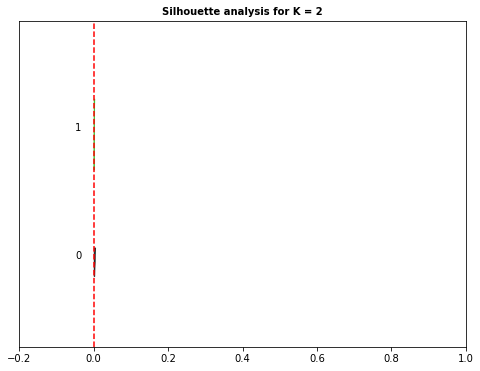

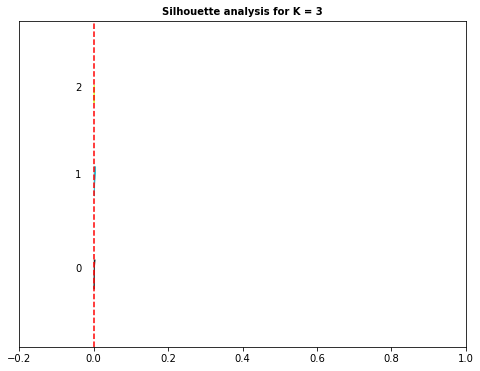

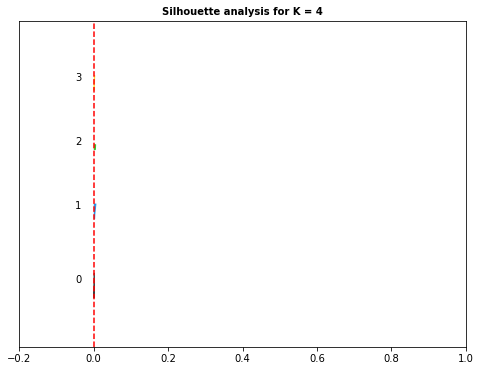

In [124]:
silhouette(kmeans_results, final_df, plot=True)

In [125]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

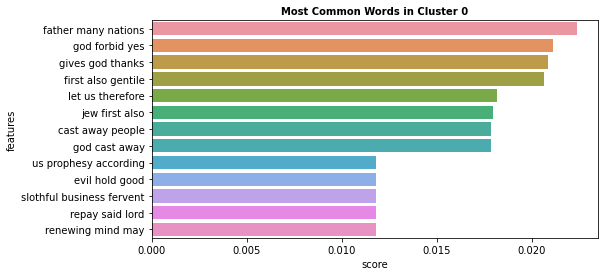

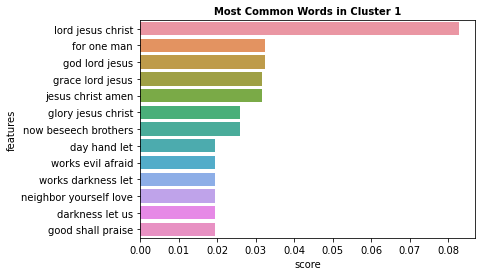

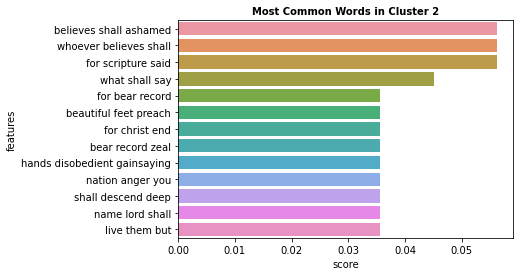

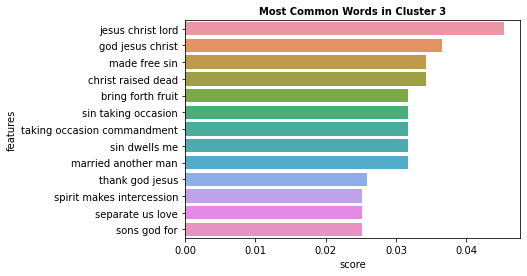

In [126]:
best_result = 4
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [127]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

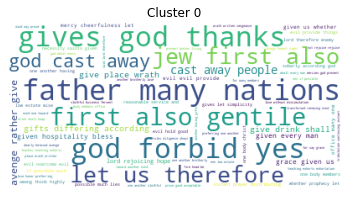

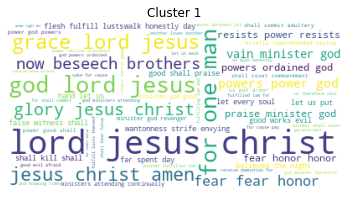

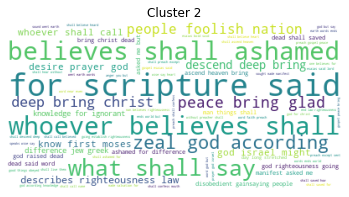

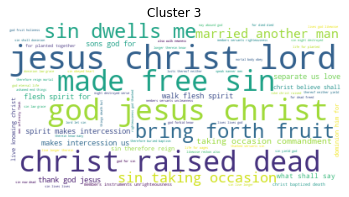

In [128]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [129]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Romanos_1,"'paul', ',', 'servant', 'jesus', 'christ', ','...",3
101,Romanos_2,"'therefore', 'inexcusable', ',', 'man', ',', '...",0
102,Romanos_3,"'advantage', 'jew', '?', 'profit', 'circumcisi...",0
103,Romanos_4,"'shall', 'say', 'abraham', 'father', ',', 'per...",0
104,Romanos_5,"'therefore', 'justified', 'faith', ',', 'peace...",1


In [130]:
print(df)

          Autor                                              Livro  label
100   Romanos_1  'paul', ',', 'servant', 'jesus', 'christ', ','...      3
101   Romanos_2  'therefore', 'inexcusable', ',', 'man', ',', '...      0
102   Romanos_3  'advantage', 'jew', '?', 'profit', 'circumcisi...      0
103   Romanos_4  'shall', 'say', 'abraham', 'father', ',', 'per...      0
104   Romanos_5  'therefore', 'justified', 'faith', ',', 'peace...      1
105   Romanos_6  'shall', 'say', '?', 'shall', 'continue', 'sin...      3
106   Romanos_7  'know', ',', 'brothers', ',', '(', 'speak', 'k...      3
107   Romanos_8  'therefore', 'condemnation', 'christ', 'jesus'...      3
108   Romanos_9  'say', 'truth', 'christ', ',', 'lie', ',', 'co...      2
109  Romanos_10  'brothers', ',', 'heart', ', 'desire', 'prayer...      2
110  Romanos_11  'say', ',', 'god', 'cast', 'away', 'people', '...      0
111  Romanos_12  'beseech', 'therefore', ',', 'brothers', ',', ...      0
112  Romanos_13  'let', 'every', 'soul